<a href="https://colab.research.google.com/github/AndrewDavidRatnam/Deep-Learning-Workshop/blob/main/Deep_Learning_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Pytorch
---
GROK

---

Deep Learning with PyTorch: Lecture Summary and Autograd Focus
- 🔹 Key Takeaways

  - PyTorch Overview: PyTorch is a dynamic deep learning framework centered around tensors, offering flexibility for building models like feedforward neural networks (ANNs), convolutional neural networks (CNNs), and recurrent neural networks (RNNs). Its evolving nature (e.g., version 2.0) simplifies operations and enhances deployment capabilities.
  - Tensors as Core: Tensors are multidimensional arrays (akin to NumPy arrays but GPU-compatible) that represent inputs, parameters, and outputs in deep learning models. PyTorch provides robust tensor manipulation on both CPU and GPU.
  - torch.nn Module: The torch.nn module simplifies neural network construction, abstracting low-level tensor operations to define layers and architectures efficiently, reducing error-prone manual computations.
  - Autograd for Gradients: PyTorch’s autograd module automatically computes gradients for backpropagation, eliminating the need to manually define backward passes, which is critical for training deep learning models.
  - Deployment and Optimization: PyTorch supports model optimization (e.g., via JIT compilation) and deployment across hardware, with utilities like multiprocessing and domain-specific libraries (e.g., torchvision, torchtext).
  - Why PyTorch?: Compared to frameworks like TensorFlow, PyTorch’s dynamic computation graph and Pythonic API make it intuitive for research and debugging, with interoperability (e.g., ONNX) for cross-framework use.
  - Importance of Basics: Understanding tensor operations, memory layout (e.g., strides), and hardware interactions is crucial for debugging, optimizing, and scaling models, especially when performance issues arise.
  - Domain-Specific Libraries: Libraries like Hugging Face (built on PyTorch and TensorFlow) simplify NLP tasks, but mastering PyTorch fundamentals enables seamless transitions to such tools.

- 🔢 Mathematical Insight
The autograd module in PyTorch is central to training neural networks via gradient-based optimization. For a neural network with parameters $(\theta)$, the goal is to minimize a loss function $(L(y, \hat{y})$), where $(y)$ is the true label and $(\hat{y} = f(x; \theta))$ is the model’s prediction. The gradient of the loss with respect to the parameters, $(\frac{\partial L}{\partial \theta})$, is computed using the chain rule during backpropagation.
For a simple feedforward layer, consider:$ [ z = Wx + b ]$ and $ [ a = \sigma(z) ]$ where $(W)$ is the weight matrix, $(b)$ is the bias, $(x)$ is the input, and $(\sigma)$ is an activation function $(e.g., ReLU)$. The loss $(L)$ depends on $(a)$, and autograd computes:$[ \frac{\partial L}{\partial W} = \frac{\partial L}{\partial a} \cdot \frac{\partial a}{\partial z} \cdot \frac{\partial z}{\partial W} ]$ Here, $(\frac{\partial z}{\partial W} = x)$, and autograd tracks these dependencies automatically by building a dynamic computation graph during the forward pass. This graph records operations on tensors with requires_grad=True, enabling efficient gradient computation in the backward pass.
- 🧠 PyTorch Code
Below is a concise example demonstrating autograd in a simple linear layer with a mean squared error (MSE) loss, showcasing automatic gradient computation.

```
import torch
import torch.nn as nn

# Define a simple linear layer
x = torch.tensor([[1.0, 2.0]], requires_grad=False)  # Input
y_true = torch.tensor([[3.0]])  # Target
W = torch.tensor([[0.5, 1.0]], requires_grad=True)  # Weights
b = torch.tensor([[0.1]], requires_grad=True)  # Bias

# Forward pass
z = x @ W.t() + b  # Linear transformation
y_pred = z  # No activation for simplicity
loss = nn.MSELoss()(y_pred, y_true)  # Compute MSE loss

# Backward pass (autograd computes gradients)
loss.backward()

# Access gradients
print("Gradient w.r.t. W:", W.grad)
print("Gradient w.r.t. b:", b.grad)
```
This code defines a linear layer, computes the loss, and uses autograd to calculate gradients for (W) and (b), which can be used for parameter updates in gradient descent.
- 💡 Analogy or Story
Think of autograd as a meticulous accountant in a busy restaurant kitchen. The chef (the neural network) prepares a dish (the forward pass) by combining ingredients (tensors) in specific ways (operations like matrix multiplication or activation). The accountant tracks every step of the recipe, noting how each ingredient contributes to the final dish. When the food critic (the loss function) provides feedback (the loss value), the accountant quickly calculates how much each ingredient’s quantity (parameters) needs adjustment to improve the dish (minimize the loss). This tracking and adjustment process is seamless, allowing the chef to focus on cooking (model design) without manually recalculating contributions (gradients).
- 🔁 Relation to Previous Concepts
This lecture builds on foundational deep learning principles, such as the role of tensors as the universal data structure for inputs, weights, and outputs, which may have been introduced in earlier lessons on linear algebra or NumPy. The emphasis on autograd connects to prior discussions of backpropagation, where gradients are manually derived for simple networks. Here, PyTorch’s autograd automates this process, reinforcing the importance of the chain rule and computation graphs. The torch.nn module extends concepts of neural network layers (e.g., linear transformations, activations) by providing a high-level API, aligning with earlier lessons on designing ANNs. The focus on debugging and optimization ties back to performance analysis techniques, such as monitoring gradient flow to diagnose issues like vanishing gradients, which may have been covered in gradient-based optimization lectures.
Prerequisites: Learners should have basic knowledge of linear algebra (matrices, vectors), calculus (derivatives, chain rule), and Python programming. Familiarity with NumPy and introductory neural network concepts (e.g., forward/backward passes) is helpful but not mandatory, as the lecture introduces PyTorch-specific implementations.

---
Perplexity

---
🔹 **Key Takeaways**

- PyTorch is a leading deep learning framework, preferred for its flexibility, Pythonic interface, and rapid evolution (notably, from version 1.8 to 2.0, with ongoing simplifications and new modules)[1].
- At its core, PyTorch is built around *tensors*—multi-dimensional arrays that generalize vectors and matrices, serving as the fundamental data structure for all deep learning computations[1].
- PyTorch provides robust support for both CPU and GPU computation, making large-scale model training and deployment efficient and accessible[1].
- The framework is modular: low-level APIs (like tensor operations), mid-level modules (like `torch.nn` for building neural networks), and high-level, domain-specific libraries (like `torchvision` and `torchtext`)[1].
- Automatic differentiation (autograd) is seamlessly integrated, allowing gradients to be computed automatically and enabling efficient backpropagation[1].
- Understanding the *internals* (e.g., tensor memory layout, strides, device management) is crucial for debugging, optimizing, and deploying models, especially as models and datasets scale[1].
- PyTorch’s design encourages both rapid prototyping (with high-level APIs) and deep customization (via low-level tensor operations), making it suitable for both research and production[1].
- The lecture emphasizes the importance of foundational understanding—knowing how tensors work, how memory is managed, and why frameworks like PyTorch are necessary compared to NumPy or native Python[1].

🔢 **Mathematical Insight**

- A **tensor** is a generalization of scalars (rank-0), vectors (rank-1), and matrices (rank-2) to higher dimensions. Mathematically, a tensor of rank $ n $ can be represented as an $ n $-dimensional array:

  $
  \text{Tensor} \in \mathbb{R}^{d_1 \times d_2 \times \cdots \times d_n}
  $

- In deep learning, inputs (images, text, audio), parameters (weights, kernels), and outputs are all represented as tensors.
- **Backpropagation** leverages the chain rule for efficient gradient computation, which PyTorch automates with its autograd engine:

  $
  \frac{\partial L}{\partial \theta} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial \theta}
  $

  where $ L $ is the loss, $ y $ is the output, and $ \theta $ are the parameters.

🧠 **PyTorch Code**

Below is a concise example showing the essentials: tensor creation, moving to GPU, defining a simple neural network (feedforward), and leveraging autograd for gradient computation.

```python
import torch
import torch.nn as nn

# 1. Create a tensor on CPU and move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
x = torch.randn(64, 28*28, device=device)  # batch of 64, input size 28x28

# 2. Define a simple feedforward neural network using torch.nn
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 100)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(100, 10)  # 10 classes

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        return self.fc2(x)

model = SimpleNN().to(device)

# 3. Forward pass and compute loss
y_true = torch.randint(0, 10, (64,), device=device)
criterion = nn.CrossEntropyLoss()
y_pred = model(x)
loss = criterion(y_pred, y_true)

# 4. Backward pass (autograd)
loss.backward()

# Inspect gradients
print(model.fc1.weight.grad.shape)  # Should be [100, 784]
```

💡 **Analogy or Story**

*Think of PyTorch as a box of Lego blocks.* Each tensor is a block, and operations (like matrix multiplication or convolution) are ways of connecting them. You can build a simple toy (a small neural network) or an elaborate structure (a large language model)—the difference is only in the number and arrangement of blocks. The framework gives you both the raw blocks (tensors, low-level ops) and pre-built pieces (modules like `torch.nn`) to assemble anything you imagine. The more you understand how these blocks fit and interact (memory layout, device placement), the more robust and efficient your creations become.

🔁 **Relation to Previous Concepts**

- Builds directly on foundational knowledge of linear algebra (vectors, matrices, and their operations), as all deep learning computations are tensor manipulations[1].
- Extends the principles of supervised learning: data is represented as tensors, models as compositions of tensor operations, and learning as iterative optimization via backpropagation.
- The transition from NumPy to PyTorch is motivated by the need for GPU acceleration, automatic differentiation, and scalable deployment—key requirements for modern deep learning[1].
- Understanding PyTorch’s architecture and internals sets the stage for advanced topics: convolutional neural networks (CNNs), recurrent neural networks (RNNs), transformers, and efficient model deployment[1].

Citations:
[1] https://ppl-ai-file-upload.s3.amazonaws.com/web/direct-files/63649134/5065b4d5-154e-4783-b341-d0514085c45c/paste-1.txt


 # Deep Learning with PyTorch: Lecture 2 Summary and Tensors Explanation

---
#GROK

---
## 🔹 Key Ideas from the Lecture

- **Tensors as Core Data Structures**: Tensors in PyTorch are multidimensional arrays that store data (e.g., inputs, weights) and support operations like matrix multiplication. They are created with a single line (e.g., `torch.tensor()`) and have attributes like shape, device, and gradient tracking.
- **Tensor Attributes**: Key attributes include `shape` (dimensions), `device` (CPU/GPU), `requires_grad` (for gradient computation), `stride` (memory layout), and `grad` (stored gradients). These are critical for optimization and debugging.
- **CPU to GPU Movement**: Moving tensors from CPU to GPU is computationally expensive due to differing memory formats. This is necessary for parallelized operations like matrix multiplication, but requires careful management (e.g., pinned memory).
- **Memory Storage**: Tensors are stored in contiguous memory as a flattened 1D array (row-major order in PyTorch), with a logical multidimensional view created using strides. This impacts performance and optimization.
- **Dimensionality and Access**: Accessing elements in a tensor reduces its dimensionality (e.g., a 2D tensor becomes 1D), which can cause dimension mismatch errors in operations like matrix multiplication if not handled properly.
- **PyTorch vs. NumPy**: Unlike NumPy arrays, PyTorch tensors support GPU acceleration and autograd for gradient computation. Mixing NumPy arrays with PyTorch tensors requires conversion to ensure compatibility, especially for gradient tracking.
- **Practical Debugging**: Understanding tensor properties (e.g., dimensionality, strides) is essential for debugging errors like dimension mismatches or optimizing performance, particularly in large-scale models.
- **PyTorch 2.0 Features**: The lecture highlights PyTorch 2.0’s updated features, emphasizing the need to check hardware compatibility (e.g., NVIDIA GPUs) and refer to documentation for installation and debugging.

## 🔢 Tensors: Mathematical Foundations

Tensors are multidimensional arrays that generalize scalars $(rank-0)$, vectors $(rank-1)$, and matrices $(rank-2)$ to higher ranks. A tensor $\( \mathbf{T} \in \mathbb{R}^{n_1 \times n_2 \times \cdots \times n_k} \)$ has $\( k \)$ dimensions, where each $\( n_i \)$ is the size of the $\( i \)$-th axis. For example:
- A 2D tensor $(matrix)$: $\( \mathbf{M} \in \mathbb{R}^{m \times n} \)$, e.g., $\( \begin{bmatrix} 0 & 2 \\ 1 & 1 \end{bmatrix} \)$.
- A 3D tensor $(e.g., RGB image)$: $\( \mathbf{T} \in \mathbb{R}^{height \times width \times 3} \)$.

In deep learning, tensors represent inputs, parameters, and outputs. For a linear layer:
$\[ \mathbf{z} = \mathbf{W} \mathbf{x} + \mathbf{b} \]$
where $\( \mathbf{x} \in \mathbb{R}^n \)$ $(input tensor)$, $\( \mathbf{W} \in \mathbb{R}^{m \times n} \)$ $(weight tensor)$, $\( \mathbf{b} \in \mathbb{R}^m \)$ $(bias tensor)$, and $\( \mathbf{z} \in \mathbb{R}^m $ $(output tensor)$. The operation requires compatible dimensions $(e.g., \( n \) must match)$. Accessing an element, e.g., $ \mathbf{M}[0] $, reduces the tensor’s rank (from 2 to 1), which can lead to errors if subsequent operations expect the original shape.

Tensors are stored in contiguous memory as a 1D array, with strides defining how to navigate the logical multidimensional structure. For a 2x2 matrix $ \mathbf{M} $, stored as $ [0, 2, 1, 1] $, the stride $ [2, 1] $ indicates steps in memory to move along rows $(2 elements)$ or columns $(1 element)$. This enables efficient operations like transposition without copying data, as only strides are updated.

## 🧠 PyTorch Code

Below is a concise PyTorch snippet demonstrating tensor creation, attributes, and dimensionality reduction, highlighting practical usage.

```python
import torch

# Create a 2D tensor
x = torch.tensor([[0, 2], [1, 1]], dtype=torch.float32, requires_grad=True)

# Access attributes
print("Tensor:\n", x)
print("Shape:", x.shape)
print("Strides:", x.stride())
print("Device:", x.device)
print("Requires grad:", x.requires_grad)

# Access element (reduces dimension)
y = x[0]  # 1D tensor
print("Accessed element (1D):\n", y, "Shape:", y.shape)

# Matrix multiplication
z = torch.matmul(x, x.t())  # Requires compatible dimensions
print("Matrix product:\n", z)
```

This code creates a 2D tensor, displays its attributes, shows dimensionality reduction when accessing an element, and performs a matrix multiplication, illustrating tensor operations.

## 💡 Analogy: Tensors as a Warehouse

Imagine a massive warehouse storing goods (data) in PyTorch. Each item is packed into boxes (tensors) of varying shapes: a single item (scalar), a row of items (vector), a grid of shelves (matrix), or stacked grids (higher-rank tensor). In NLP, a tensor might be a stack of word embeddings (batch × sequence length × embedding dimension), while in computer vision, it’s a grid of pixels (height × width × channels). The warehouse’s inventory system (PyTorch) tracks each box’s properties: size (shape), location (CPU/GPU), and whether it needs updating (requires_grad). Goods are stored in a single, continuous row (contiguous memory), but the system uses a map (strides) to view them as multidimensional structures, like organizing shelves logically without moving items.

Moving boxes from the main storage (CPU) to a high-speed processing unit (GPU) is time-consuming, like transporting goods to a faster distribution center. Accessing an item (e.g., a row from a grid) unpacks a smaller box (lower-rank tensor), which can cause issues if a machine expects the original grid for processing (dimension mismatch). The warehouse’s efficiency (optimization) depends on understanding this map and avoiding unnecessary moves, mirroring tensor management in deep learning.

## 🔁 Connection to Prior Lessons

This lecture builds on your NLP studies, where text data (e.g., tokenized sentences) is represented as tensors for transformer models, similar to the multidimensional arrays discussed here. The focus on tensor operations connects to your gradient descent discussions, where weights (tensors) are updated iteratively, requiring autograd compatibility that NumPy lacks. The dimensionality issues echo preprocessing challenges in decision tree models (e.g., California Housing dataset), where feature arrays must align correctly. Understanding tensor attributes like strides prepares you for optimizing NLP models in Hugging Face, as efficient memory management is critical for large transformer models.

**Word Count**: ~650 words

**Prerequisites**: Basic linear algebra (vectors, matrices), Python programming, and familiarity with NumPy. Prior exposure to machine learning concepts (e.g., gradient descent, NLP data processing) is helpful but not required.

---
#Perplexity

---
🔹 **Key Takeaways from "Lecture 2: Tensors" (PyTorch Deep Learning)**

- **Tensors as the Foundation of Deep Learning**  
  - In PyTorch, *tensors* are the core data structure, generalizing scalars, vectors, and matrices to N-dimensional arrays.
  - Creating a tensor is straightforward: `torch.tensor(data)` constructs a tensor object, which has numerous associated methods and attributes (e.g., `shape`, `stride`, `device`, `requires_grad`, `grad_fn`).
  - Every tensor in PyTorch is an object that stores data in contiguous memory, typically as a flattened (1D) C/C++ array. The logical N-dimensional shape is a *view* on this flat storage, managed via *strides*.

- **Memory Layout and Strides**  
  - The *stride* of a tensor determines how many memory steps you need to move along each dimension. It’s crucial for understanding how PyTorch efficiently accesses elements and performs operations.
  - PyTorch (like NumPy) uses *row-major* order (C-style), meaning elements in the last dimension are contiguous in memory.

- **Device Management: CPU vs. GPU**  
  - Tensors can reside on either the CPU or GPU. Moving a tensor between devices (`tensor.to('cuda')`) is a *costly* operation, as it involves copying and potentially reformatting data for the target hardware.
  - The *pin_memory* argument is relevant when transferring data between CPU and GPU, optimizing data transfer speed, especially for large datasets.

- **Tensor Attributes and Creation**  
  - When creating tensors, key arguments include:
    - `data`: The initial values (list, array, etc.)
    - `dtype`: Data type (e.g., `torch.float32`)
    - `device`: Where to store the tensor (`'cpu'` or `'cuda'`)
    - `requires_grad`: Whether to track gradients for automatic differentiation
    - `pin_memory`: Optimizes transfer to GPU (advanced use)
  - Example:  
    ```python
    x = torch.tensor([1, 2, 3], dtype=torch.float32, device='cuda', requires_grad=True)
    ```

- **Scalar, 1D, and Multi-Dimensional Tensors**  
  - Passing a single value creates a *scalar* (0D tensor).  
  - Passing a list creates a 1D tensor, a list of lists a 2D tensor, and so on.
  - Accessing elements reduces the tensor’s dimensionality by one. For example, accessing an element of a 2D tensor returns a 1D tensor.
  - This reduction in dimension is critical: it can cause shape mismatches in later operations, especially in matrix multiplication or broadcasting.

- **Accessing Tensor Data**  
  - For *scalars* (0D tensors), use `.item()` to extract the value.
  - For higher-dimensional tensors, standard Python indexing applies, but always be mindful of the resulting shape and dimension.

- **Interoperability and Gradient Tracking**  
  - PyTorch tensors are not interchangeable with NumPy arrays or other frameworks’ data structures, especially if you need gradient computation.
  - All operations requiring gradients must be performed with PyTorch tensors (`requires_grad=True`), as PyTorch’s autograd system tracks only its own tensors.

- **Practical Debugging and Internals**  
  - Understanding tensor attributes and memory layout helps in debugging shape and device errors.
  - PyTorch’s internal organization is modular, with a C++ backend and Pythonic front-end. Most tensor operations ultimately call optimized C++ code for performance.

- **Installation and Compatibility**  
  - Installing PyTorch with GPU support requires careful attention to hardware and CUDA version compatibility. Errors here are often cryptic and difficult to debug.

---

### **Mathematical Foundations**

- **Tensor Definition:**  
  A tensor of rank $ n $ is an $ n $-dimensional array:  
  $
  \text{Tensor} \in \mathbb{R}^{d_1 \times d_2 \times \cdots \times d_n}
  $
- **Stride Calculation:**  
  For a tensor $ X $ with shape $(d_1, d_2, ..., d_n)$, the stride tells you how many memory steps to take to move along each dimension.
- **Gradient Tracking:**  
  If $ y = f(x) $ and $ x $ is a tensor with `requires_grad=True`, PyTorch will automatically compute  
  $
  \frac{\partial y}{\partial x}
  $
  during backpropagation.

---

### **Practical Code Example**

```python
import torch

# Create a scalar tensor
scalar = torch.tensor(9)
print("Scalar:", scalar, "| Shape:", scalar.shape, "| Dim:", scalar.ndim)

# Create a 1D tensor
vec = torch.tensor([9])
print("1D Tensor:", vec, "| Shape:", vec.shape, "| Dim:", vec.ndim)

# Create a 2D tensor
mat = torch.tensor([[0, 2], [1, 1]])
print("2D Tensor:", mat, "| Shape:", mat.shape, "| Dim:", mat.ndim)

# Move tensor to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
mat_gpu = mat.to(device)

# Demonstrate requires_grad
param = torch.tensor([1.0, 2.0], requires_grad=True)
y = (param ** 2).sum()
y.backward()
print("Gradient:", param.grad)

# Accessing elements and observing dimension reduction
elem = mat[0]
print("Element mat[0]:", elem, "| Shape:", elem.shape, "| Dim:", elem.ndim)
```

---

### **Analogy: Tensors as Apartment Buildings**

Imagine a tensor as a *large apartment building*:

- The **building** itself is a single, long corridor of rooms (the contiguous memory array).
- The **floors, wings, and rooms** represent dimensions:  
  - 1st dimension = floors  
  - 2nd dimension = wings on each floor  
  - 3rd dimension = rooms in each wing, etc.
- The **address** of a specific room (element) is calculated using *strides*—how many steps to take to move between floors, wings, or rooms.
- The **logical layout** (floors, wings, rooms) is just a way to help people (and programs) find rooms quickly, but all rooms are still arranged in a single corridor.
- **Moving the building** (CPU to GPU) means copying all rooms to a new location, possibly rearranging them to fit the new city’s (device’s) rules—this takes time and planning.
- **Accessing a room** (element) on a particular floor and wing (dimension) gives you a smaller building (tensor) with one less floor (dimension).

**Why is this important?**  
Just as knowing the building’s layout helps you find rooms efficiently and avoid getting lost, understanding tensor shapes, strides, and devices helps you write bug-free, high-performance deep learning code. If you forget how the rooms are arranged (lose track of dimensions), you might not be able to deliver the pizza (compute the operation) to the right room (tensor element)!

---

### **Connecting to Prior Lessons**

- Builds on the idea that *all* deep learning computations are ultimately tensor operations.
- Reinforces the importance of device management for leveraging hardware acceleration.
- Highlights the need for careful attention to tensor shapes and dimensions to avoid subtle bugs in model implementation.
- Prepares you for more advanced topics, such as broadcasting, automatic differentiation, and efficient data pipelines.

---

**Summary:**  
Understanding PyTorch tensors—their creation, attributes, memory layout, device management, and interaction with autograd—is foundational for all deep learning work. Mastery here leads to fewer bugs, faster code, and a deeper intuition for building and debugging neural networks.

---

# Attributes to tensors

---
#GROK
# Deep Learning with PyTorch: Lecture 3 Attributes Tensors Summary and Strides Explanation

As a deep learning instructor with over a decade of experience specializing in PyTorch, I’ll summarize the key ideas from the "Lecture 3 Attributes Tensors" video, focusing on the mathematical foundations and practical applications of **tensor strides**, a critical concept highlighted in the transcript. The summary of key ideas will be at least 600 words to capture the essence of the lecture. I’ll explain strides using analogies and real-world examples, connecting to your prior studies in natural language processing (NLP), gradient descent, and decision trees, as noted in our previous conversations (e.g., NLP tensor representations, gradient descent as iterative refinement). The response will adhere to the requested format, include a concise code snippet (≤35 lines), and focus on mathematical foundations and practical applications.

## 🔹 Key Ideas from the Lecture (Summary, ~650 words)

- **Tensor Dimensions and Structure**: Tensors are multidimensional arrays, with dimensionality determined by nested brackets. A scalar (0D) has no brackets, a 1D tensor (vector) has one set (e.g., `[1, 2, 3]`), and a 2D tensor (matrix) has two (e.g., `[[1, 2], [3, 4]]`). Each dimension’s size must match (e.g., a 3x3 matrix has three rows, each with three elements). This structure is crucial for operations like matrix multiplication in neural networks, where dimension mismatches cause errors.
- **Memory Storage and Flattening**: Internally, tensors are stored in contiguous memory as a flattened 1D array in row-major order (e.g., a 2x2 matrix `[[0, 2], [1, 1]]` is stored as `[0, 2, 1, 1]`). The logical multidimensional view is constructed using metadata like shape and strides, enabling efficient access without restructuring memory.
- **Stride Concept**: Strides are metadata that define the number of memory steps to move along each dimension. For a 3x3 matrix, strides `[3, 1]` indicate 3 steps to move to the next row and 1 step to the next column. Strides enable operations like accessing elements or summing along dimensions without copying data, critical for performance.
- **Accessing Elements and Dimensionality Reduction**: Accessing an element in a tensor reduces its dimensionality (e.g., accessing `x[1]` in a 3x3 matrix returns a 1D tensor of length 3). This can lead to dimension mismatch errors in operations like matrix multiplication if not managed, especially in complex models.
- **Reduction Operations**: Operations like sum or max (e.g., `torch.sum(x, dim=0)`) reduce a dimension by aggregating elements along it, resulting in a tensor with one fewer dimension. For example, summing a 3x3 matrix along `dim=0` (rows) produces a 1x3 tensor. Strides guide these operations internally to ensure correct element selection.
- **Practical Implications for Debugging**: Understanding strides and dimensions is essential for debugging semantic errors, such as incorrect reduction operations that don’t throw errors but degrade model performance (e.g., summing along the wrong dimension in NLP batch processing). These errors are hard to detect without a grasp of tensor mechanics.
- **Stride-Based Efficiency**: Operations like transposition or extracting diagonal elements use strides to avoid copying data, significantly reducing computational cost. For a 1000x1000 matrix, extracting diagonals using strides requires \( O(n) \) operations, not \( O(n^2) \), enhancing efficiency in large-scale models.
- **Cautions with Tensor Operations**: Converting NumPy arrays to PyTorch tensors or copying tensors (e.g., using `clone()`) involves memory interactions that can affect performance or gradients. In-place operations (e.g., modifying a tensor directly) can disrupt gradient computation, requiring careful handling in training.
- **Real-World Applications**: In NLP, tensors represent batched sequences (e.g., batch × sequence length × embedding dimension), requiring correct dimension handling for operations like attention. In computer vision, transposing image tensors (e.g., height × width × channels) involves specifying dimensions to avoid incorrect channel swaps, as shown in the lecture’s image example.
- **Foundational Importance**: Like backpropagation or tree traversal in prior studies, mastering tensor attributes is foundational but challenging. The lecture emphasizes practicing with small tensors to build intuition, as errors in dimension handling can compound in complex architectures like CNNs or transformers, echoing the need to revisit basics.

## 🔢 Strides: Mathematical Foundations

Strides define how a tensor’s flattened 1D memory array is navigated to form its logical multidimensional structure. For a tensor \( \mathbf{T} \in \mathbb{R}^{n_1 \times n_2 \times \cdots \times n_k} \), the stride for dimension \( i \) is the number of elements to skip in memory to move one step along that dimension. For a 3x3 matrix \( \mathbf{M} \):
\[ \mathbf{M} = \begin{bmatrix} 0.1 & 0.2 & 0.3 \\ 0.4 & 0.5 & 0.6 \\ 0.7 & 0.8 & 0.9 \end{bmatrix} \]
Stored as `[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]`, the strides are `[3, 1]`:
- Stride for `dim=0` (rows): 3, as moving to the next row skips 3 elements.
- Stride for `dim=1` (columns): 1, as moving to the next column skips 1 element.

To access \( \mathbf{M}[i, j] \), the memory index is:
\[ \text{index} = i \cdot \text{stride}[0] + j \cdot \text{stride}[1] \]
For \( \mathbf{M}[1, 2] \):
\[ \text{index} = 1 \cdot 3 + 2 \cdot 1 = 5 \]
This points to `0.6`. For reduction, summing along `dim=0`:
\[ \text{sum}[j] = \sum_{i=0}^{2} \mathbf{M}[i, j] \]
The stride `[3, 1]` guides iteration over rows for each column, yielding `[1.2, 1.5, 1.8]`. Strides ensure efficient operations without reshaping memory.

## 🧠 PyTorch Code

Below is a concise PyTorch snippet demonstrating strides and reduction operations, illustrating their role in tensor manipulation.

```python
import torch

# Create a 3x3 tensor
x = torch.tensor([[0.1, 0.2, 0.3],
                  [0.4, 0.5, 0.6],
                  [0.7, 0.8, 0.9]])

# Access attributes
print("Tensor:\n", x)
print("Shape:", x.shape)
print("Strides:", x.stride())

# Access element (reduces dimension)
row = x[1]  # 1D tensor [0.4, 0.5, 0.6]
print("Row (dim=0, index=1):\n", row, "Shape:", row.shape)

# Reduction operation: sum along dim=0
sum_dim0 = torch.sum(x, dim=0)
print("Sum along dim=0:\n", sum_dim0, "Shape:", sum_dim0.shape)
```

This code creates a 3x3 tensor, displays its strides, accesses a row (reducing dimensionality), and performs a sum along `dim=0`, showing stride-guided reduction.

## 💡 Analogy: Strides as a Library Catalog

Imagine a library where books (tensor elements) are stored in a single, continuous row on a shelf (contiguous memory). The library’s catalog (strides) provides instructions to navigate this row as if books were arranged in multidimensional shelves (e.g., rows and columns for a matrix). For a 3x3 matrix, the catalog lists strides `[3, 1]`, meaning move 3 books to reach the next row or 1 book for the next column. To find a book (e.g., `M[1, 2]`), the catalog calculates its position without rearranging shelves, ensuring quick access.

In NLP, a tensor of batched sentences (batch × sequence length × embedding dimension) is like a library with books organized by batch, sentence, and word features. Summing embeddings across sentences (e.g., `dim=1`) uses the catalog to add books element-wise, reducing the sentence dimension. Misinterpreting the catalog (strides) can lead to adding the wrong books, like summing across batches instead, causing errors in model performance, similar to misaligned data in your NLP preprocessing.

## 🔁 Connection to Prior Lessons

This lecture builds on your NLP studies, where tensors represent batched sequences for transformers, requiring precise dimension handling (e.g., batch × sequence length × embedding dimension). Strides connect to your gradient descent discussions, as efficient tensor operations (guided by strides) accelerate parameter updates, akin to optimizing iterative refinement. The dimensionality reduction issue echoes preprocessing challenges in decision trees (e.g., California Housing dataset), where feature arrays must align. Understanding strides prepares you for debugging NLP models in Hugging Face, where incorrect reduction operations (e.g., summing across wrong dimensions) can degrade transformer performance, reinforcing the need to master foundational tensor mechanics.

**Prerequisites**: Basic linear algebra (vectors, matrices), Python programming, and familiarity with NumPy. Prior exposure to NLP tensor representations and gradient descent is helpful but not required.

---
#Perplexity

---
🔹 **Summary of Key Ideas from "Lecture 3: Attributes and Tensors" (PyTorch Deep Learning)**

- **Tensors: Structure, Dimensions, and Memory**
  - Tensors are the fundamental data structure in PyTorch, generalizing scalars, vectors, and matrices to N-dimensional arrays.
  - The *dimension* of a tensor (also called “rank”) is determined by the number of nested brackets or axes. For example, a list forms a 1D tensor, a list of lists forms a 2D tensor, and so on.
  - Each dimension can be accessed and indexed, and accessing an element reduces the tensor’s dimensionality by one.
  - Internally, all tensor elements are stored in a contiguous, flattened memory block. The logical multi-dimensional structure is a *view* managed by *stride* and *shape* metadata.

- **Stride: The Key to Efficient Access**
  - *Stride* is a tuple that tells how many steps in memory you need to take to move along each dimension. For a 1D tensor, the stride is typically 1; for a 2D tensor (matrix), it’s usually (number of columns, 1) in row-major order.
  - Stride enables efficient element access: accessing an element by index is a constant-time (O(1)) operation, simply an offset calculation in memory.
  - When slicing or indexing tensors, PyTorch uses stride and shape to create “views” without copying data, making operations efficient but sometimes surprising if you expect a copy.

- **Indexing and Dimensionality**
  - Indexing a tensor with fewer indices than its rank returns a tensor of lower dimension (e.g., indexing a matrix with one index returns a vector/1D tensor).
  - This reduction in dimension is crucial for understanding the outputs of operations and for debugging shape mismatches in code.

- **Reduction Operations and Axes**
  - Operations like `sum`, `mean`, or `max` across a particular dimension are called *reductions* because they reduce the tensor’s rank by one.
  - The `dim` (or `axis`) parameter specifies which dimension to reduce. For example, summing along `dim=0` means summing across rows (i.e., column-wise sum), while `dim=1` means summing across columns (row-wise sum).
  - The choice of axis is critical: incorrect axes can lead to silent semantic errors that are hard to debug, especially in large models.

- **Practical Implications for Deep Learning**
  - In deep learning, tensors often have 4 or more dimensions (e.g., batches, channels, height, width in vision; batches, sequence length, embedding size in NLP), so mastering dimensions and strides is essential.
  - Reduction operations are ubiquitous—for loss calculation, aggregation, or pooling—and mistakes in axis specification can silently degrade model performance.
  - PyTorch (like NumPy and TensorFlow) always stores tensors as flat arrays with metadata for shape and stride, allowing efficient logical views and operations.

- **Copying, Views, and In-Place Operations**
  - Assigning one tensor to another (e.g., `y = x`) creates a view, not a copy; changes to one affect the other. To make a true copy, use `x.clone()`.
  - Converting between NumPy arrays and PyTorch tensors often creates shared-memory views, so changes in one may reflect in the other—be cautious!
  - In-place operations (`x.add_()`, `x.copy_()`, etc.) can interfere with gradient computation and should generally be avoided unless you fully understand the implications.

- **Transposing and Manipulating Dimensions**
  - Transposing multi-dimensional tensors (e.g., images with shape `[height, width, channels]`) requires specifying which dimensions to swap.
  - Simple `transpose()` calls may not behave as expected for tensors with more than two dimensions; always specify axes explicitly.

- **Debugging and Best Practices**
  - Always check tensor shapes, strides, and device placements when debugging.
  - For complex operations, start with small, interpretable tensors to build intuition before scaling up.
  - Practice and repeated exposure are necessary to build intuition for multi-dimensional tensor operations.

---

**Mathematical Foundations & Equations**

- **Tensor Definition:**  
  $ \text{Tensor} \in \mathbb{R}^{d_1 \times d_2 \times \cdots \times d_n} $
- **Stride Calculation:**  
  For a tensor $ X $ with shape $(d_0, d_1, ..., d_{n-1})$, the stride for dimension $ i $ is the product of all dimensions to its right:
  $
  \text{stride}_i = \prod_{j=i+1}^{n-1} d_j
  $
- **Reduction Example (Sum along axis):**  
  For a 2D tensor $ X $ of shape $(m, n)$:
  $
  \text{sum}(X, \text{dim}=0) \rightarrow \text{shape: } (n)
  $
  (sums over rows, giving column-wise sum)

---

**Practical Code Example**

```python
import torch

# Create a 3D tensor (batch, rows, cols)
x = torch.tensor([
    [[1, 2], [3, 4], [5, 6]],
    [[7, 8], [9, 10], [11, 12]]
], dtype=torch.float32)

print("Shape:", x.shape)  # (2, 3, 2)
print("Stride:", x.stride())

# Sum along different axes
sum_dim0 = x.sum(dim=0)  # Sums over batch
sum_dim1 = x.sum(dim=1)  # Sums over rows
sum_dim2 = x.sum(dim=2)  # Sums over columns

print("Sum along dim 0 (batch):", sum_dim0)
print("Sum along dim 1 (rows):", sum_dim1)
print("Sum along dim 2 (cols):", sum_dim2)

# Demonstrate view vs copy
y = x[0]
y[0, 0] = 100
print("Original x after modifying y:", x)

# Proper copy
z = x.clone()
z[0, 0, 0] = 999
print("x unchanged after modifying z:", x)
```

---

**Analogy: Tensors as Multi-Level Office Buildings**

Imagine a tensor as a multi-level office building:

- **Floors** represent the first dimension; **rooms** on each floor represent the second; **desks** in each room represent the third, and so on.
- The *stride* tells you how many steps you need to take to move from one desk to the next, or from one room to the next floor.
- When you sum along a dimension, it’s like collecting all the papers from every desk on the same floor (dimension) and combining them into a single report—reducing the number of floors (dimensions) in the building.
- Assigning one floor plan to another (view) means they share the same physical space: changes in one are reflected in the other. Making a copy is like building a new, identical floor elsewhere.
- When working in a building with many floors and rooms, knowing the exact layout (shape and stride) is crucial to efficiently finding and organizing information—just as in deep learning, where correct tensor manipulation is vital for model correctness and performance.

**Takeaway:**  
Just as a building’s structure determines how people move and interact, a tensor’s shape and stride determine how data is accessed and manipulated. Mastering this “architecture” is essential for building robust, efficient deep learning models.

---



# Autograds
---
#GROK

---
# Deep Learning with PyTorch: Lecture 4 Autograd Summary and Explanation

## 🔹 Key Ideas from the Lecture (Summary, ~650 words)

- **Autograd as the Engine of Deep Learning**: Autograd is PyTorch’s automatic differentiation system, computing gradients for tensor operations, likened to the engine of a neural network, with tensors as the fuel. It enables parameter updates via backpropagation, critical for training models like neural networks, CNNs, and transformers.
- **Tensor Attributes and Gradients**: Tensors have attributes like `shape`, `device`, `requires_grad`, and `grad`. The `requires_grad=True` flag marks tensors (typically parameters like weights) for gradient computation. After backpropagation, gradients are stored in the `grad` attribute (e.g., `x.grad`), accessible for optimization.
- **Gradient Computation Process**: Autograd tracks operations during the forward pass, building a computation graph. For a neuron’s output $ z = \sigma(\mathbf{w}^T \mathbf{x} + b) $, autograd computes gradients like $ \frac{\partial L}{\partial \mathbf{w}} $ (where \( L \) is the loss) by applying the chain rule during the backward pass, accumulating gradients across samples.
- **Forward and Backward Methods**: Every operation (e.g., matrix multiplication, activation) has a forward method (computing the output) and a backward method (computing gradients). For example, for multiplication $ z = x \cdot y $, the backward method computes $ \frac{\partial L}{\partial x} = \frac{\partial L}{\partial z} \cdot y $. These are defined for elementary operations, allowing modular network construction.
- **Tape-Based Autodiff**: Autograd uses a tape-based approach, storing forward operations and their inputs (e.g., via `ctx.save_for_backward`) for use in backward passes. Unlike finite difference methods, which are numerically unstable and computationally expensive, tape-based autodiff is efficient and stable, leveraging pre-defined backward methods.
- **Elementary Operations as Lego Blocks**: Operations like matrix multiplication, addition, and activations are elementary building blocks. By defining forward and backward methods for each, autograd enables flexible network architectures (e.g., combining CNNs and RNNs in encoder-decoder models) without requiring users to compute gradients manually.
- **Practical Benefits for Debugging and Research**: Understanding autograd aids debugging (e.g., identifying vanishing gradients) and research (e.g., designing custom operations). It simplifies user interaction by abstracting gradient computation, requiring only forward pass and loss definitions, as seen in frameworks like PyTorch and TensorFlow.
- **Operation Composition**: Complex operations (e.g., a linear layer $ \mathbf{z} = \mathbf{W} \mathbf{x} + \mathbf{b} $) are composed of elementary operations (matrix multiplication and addition). Autograd handles their gradients automatically, ensuring scalability across architectures like transformers, introduced post-2017, which PyTorch supports flexibly.
- **Avoiding Common Pitfalls**: Users must ensure operations use PyTorch tensors (not NumPy arrays) for autograd compatibility. In-place operations can disrupt gradient tracking, requiring careful use (e.g., using `clone()` for copies). These considerations are critical for stable training.
- **Connection to Neural Network Training**: Autograd’s gradient accumulation (e.g., summing gradients over samples) supports stochastic gradient descent, enabling parameter updates. This is foundational for training complex models, as emphasized in the lecture’s sigmoid neuron example, where gradients drive learning.

## 🔢 Autograd: Mathematical Foundations

Autograd computes gradients using reverse-mode automatic differentiation, tracking operations in a computation graph. For a function $ z = f(\mathbf{x}, \mathbf{y}) $, where $ \mathbf{x} $ and $ \mathbf{y} $ are input tensors, autograd records the forward pass and computes gradients during the backward pass. Consider a simple operation $ z = x \cdot y $:
- Forward: $ z = x \cdot y $.
- Backward: Given the gradient $ \frac{\partial L}{\partial z} $, compute:
  $ \frac{\partial L}{\partial x} = \frac{\partial L}{\partial z} \cdot \frac{\partial z}{\partial x} = \frac{\partial L}{\partial z} \cdot y $
 $ \frac{\partial L}{\partial y} = \frac{\partial L}{\partial z} \cdot \frac{\partial z}{\partial y} = \frac{\partial L}{\partial z} \cdot x $

For a neural network layer $ \mathbf{z} = \mathbf{W} \mathbf{x} + \mathbf{b} $, followed by a sigmoid activation $ \sigma(\mathbf{z}) $ and loss $ L $, autograd builds a graph:
$ L = f(\sigma(\mathbf{W} \mathbf{x} + \mathbf{b}), \mathbf{y}) $
During backpropagation, autograd applies the chain rule:
$ \frac{\partial L}{\partial \mathbf{W}} = \frac{\partial L}{\partial \sigma} \cdot \frac{\partial \sigma}{\partial \mathbf{z}} \cdot \frac{\partial \mathbf{z}}{\partial \mathbf{W}} $
where $ \frac{\partial \mathbf{z}}{\partial \mathbf{W}} = \mathbf{x}^T $, and $ \frac{\partial \sigma}{\partial \mathbf{z}} = \sigma(\mathbf{z}) \cdot (1 - \sigma(\mathbf{z})) $. Autograd stores intermediate values e.g., $ \mathbf{x} $ and function pointers (e.g., `grad_fn`) to compute these efficiently.

## 🧠 PyTorch Code

Below is a concise PyTorch snippet demonstrating autograd for a simple neural network layer, highlighting gradient computation.

```python
import torch

# Define tensors
x = torch.tensor([1.0, 2.0], requires_grad=False)  # Input
W = torch.tensor([[0.5, 1.0], [1.5, 2.0]], requires_grad=True)  # Weights
b = torch.tensor([0.1, 0.2], requires_grad=True)  # Bias

# Forward pass
z = torch.matmul(W, x) + b
y = torch.sigmoid(z)
loss = y.sum()  # Dummy loss

# Backward pass
loss.backward()

# Access gradients
print("Gradient w.r.t. W:\n", W.grad)
print("Gradient w.r.t. b:\n", b.grad)
```

This code defines a linear layer, applies a sigmoid activation, computes a loss, and uses autograd to calculate gradients, illustrating its role in training.

## 💡 Analogy: Autograd as a GPS Navigator

Imagine training a neural network as driving a car (model) to a destination (optimal parameters) using a GPS navigator (autograd). The car’s fuel (tensors) powers the journey, but the GPS calculates the best route by analyzing slopes (gradients) at each turn. During the drive (forward pass), the GPS records the path (computation graph), noting operations like turns (matrix multiplication) or speed changes (activations). On the return trip (backward pass), it uses these records to compute slopes, guiding the car back to adjust its route (update parameters) via the chain rule, like following road signs backward.

In NLP, a transformer model processes batched sentences (tensors) to predict translations. Autograd navigates through operations (e.g., attention, feedforward layers), computing gradients to adjust weights, ensuring accurate predictions. Missteps, like using NumPy arrays, are like ignoring GPS instructions, leading to crashes (gradient errors). This mirrors debugging in your NLP studies, where correct tensor operations ensure model convergence.

## 🔁 Connection to Prior Lessons

This lecture builds on your NLP studies, where tensors represent batched sequences for transformers, requiring autograd for gradient-based training, similar to the gradient descent iterative refinement you explored with Archimedes’ method. The emphasis on elementary operations echoes decision tree preprocessing (e.g., California Housing dataset), where data alignment ensures model correctness. Autograd’s role in debugging connects to your NLP challenges with ambiguous text processing, where gradient issues (e.g., vanishing gradients) require careful tensor management, preparing you for optimizing transformer models in Hugging Face.

**Prerequisites**: Linear algebra (matrices, derivatives), Python programming, and familiarity with gradient descent. Prior exposure to NLP tensors and machine learning basics is helpful but not required.

---
#Perplexity

---
##🔹 **Key Ideas from "Lecture 4: Autograd"**  
- **Autograd as Deep Learning's Engine**:  
  - PyTorch's `autograd` automates gradient computation for tensors with `requires_grad=True`, enabling backpropagation without manual derivative calculations.  
  - Every tensor operation is tracked in a **computation graph**, allowing gradients to flow backward through the network.  

- **Core Components**:  
  - **Tensor Attributes**:  
    - `grad`: Stores computed gradients  
    - `grad_fn`: Points to the function that created the tensor (e.g., `AddBackward`, `SigmoidBackward`)  
    - `is_leaf`: Identifies tensors not created by operations (e.g., input data/parameters)  
  - **Local Gradients**: Precomputed derivatives for elementary operations (e.g., multiplication: ∂z/∂x = y) used in chain rule calculations.  

- **Forward vs. Backward Pass**:  
  - **Forward**: Operations are recorded with their backward methods.  
  - **Backward**: Receives upstream gradient (∂L/∂z), computes local gradients (∂z/∂x), and propagates ∂L/∂x = ∂L/∂z * ∂z/∂x.  

- **Efficiency Over Finite Differences**:  
  - Autograd uses symbolic differentiation (exact gradients) instead of numerical approximation, avoiding instability and redundant computations.  

- **Modular Design**:  
  - **Elementary Operations**: 100+ predefined ops (matrix mult, ReLU, etc.) with custom backward methods.  
  - **Composition**: Complex networks are built by chaining these ops, with gradients computed automatically via the chain rule.  

🔢 **Mathematical Foundations**  
- **Chain Rule**:  
  For operation $ z = f(x, y) $, gradients propagate as:  
  $
  \frac{\partial L}{\partial x} = \frac{\partial L}{\partial z} \cdot \frac{\partial z}{\partial x}
  $  
- **Local Gradient Example (Multiplication)**:  
  If $ z = x \cdot y $:  
  $
  \frac{\partial z}{\partial x} = y, \quad \frac{\partial z}{\partial y} = x
  $  

🧠 **Practical Code Example**  
```python
import torch

# Custom layer demonstrating autograd
class CustomLayer(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = torch.nn.Parameter(torch.randn(3, 3))  # Tracked for gradients

    def forward(self, x):
        return x @ self.weight  # Matrix multiplication tracked by autograd

# Forward pass
x = torch.randn(5, 3, requires_grad=True)
layer = CustomLayer()
y = layer(x)
loss = y.sum()

# Backward pass (autograd computes ∂loss/∂weight and ∂loss/∂x)
loss.backward()

print("Weight gradient:", layer.weight.grad.shape)  # [3, 3]
print("Input gradient:", x.grad.shape)  # [5, 3]
```

💡 **Analogy: Autograd as Factory Quality Control**  
*Imagine a car factory:*  
- **Forward Pass**: Assembly line workers (operations) build a car (output) using parts (input tensors). Each worker stamps a unique ID on their contribution.  
- **Backward Pass**: A defect is found (loss). Quality control (autograd) traces the ID stamps backward:  
  - Asks Worker C: "How did you install this defective part?"  
  - Worker C: "I used Part B from Worker B."  
  - Asks Worker B: "How did you make Part B?"  
  - Continues until reaching the original faulty part supplier (parameter).  
- **Result**: Identifies exactly which workers (operations) contributed to the defect and by how much (gradients).  

**Why It Matters**:  
Just as efficient defect tracing improves car manufacturing, autograd's operation-specific backward methods enable precise gradient computation for million-parameter networks.

🔁 **Connection to Prior Lessons**  
- Builds on tensor attributes (`grad_fn`, `requires_grad`) from Lecture 2-3.  
- Enables parameter updates (Lecture 1's "fuel + engine" analogy) through gradient computation.  
- Foundation for implementing advanced architectures (CNNs, transformers) covered in later lectures.  

**Key Innovation**:  
Autograd decouples network design (forward ops) from gradient math, letting researchers focus on architecture rather than derivative calculations.



# Lecture 5 Computational graphs for deep neural networks
---
#GROK

---
# Deep Learning with PyTorch: Lecture 5 Computational Graphs Summary and Explanation

## 🔹 Key Ideas from the Lecture (Summary, ~650 words)

- **Computational Graphs as the Backbone**: Computational graphs represent neural network operations as a directed acyclic graph (DAG), where nodes are tensors (leaf or non-leaf) and edges are operations (e.g., multiplication, sigmoid). They enable automatic gradient computation via autograd, forming the backbone of deep learning frameworks like PyTorch.
- **Leaf vs. Non-Leaf Tensors**: Leaf tensors are user-created (e.g., inputs $\( \mathbf{x} \)$, weights $\( \mathbf{W} \))$ with `requires_grad` set manually (True for parameters, False for inputs). Non-leaf tensors (e.g., $\( \mathbf{y} = \mathbf{W} \mathbf{x} \)$) result from operations, inheriting `requires_grad=True` if any input tensor has it, but their gradients are not stored to save memory.
- **Gradient Tracking and Inheritance**: Setting `requires_grad=True` on a tensor (e.g., $\( \mathbf{W} \)$) ensures autograd tracks operations involving it. Resulting tensors (e.g., $\( \mathbf{y} = \sigma(\mathbf{W} \mathbf{x}) \)$) inherit this property, with `grad_fn` pointing to the backward method (e.g., `SigmoidBackward`). This enables chain-rule-based gradient computation.
- **Backward Pass Mechanics**: Calling `loss.backward()` initiates backpropagation, starting with $\( \frac{\partial L}{\partial L} = 1 \)$. Autograd traverses the graph backward, computing local gradients (e.g., $\( \frac{\partial z}{\partial y} \)$) and multiplying them with incoming gradients (e.g.,$ \( \frac{\partial L}{\partial z} \)$) to produce gradients like \( \frac{\partial L}{\partial \mathbf{W}} \), stored only for leaf tensors.
- **Operation-Specific Backward Methods**: Each operation (e.g., multiplication, sigmoid) has a predefined backward method in PyTorch, computing local gradients. For example, for \( z = x \cdot y \), the backward method computes \( \frac{\partial z}{\partial x} = y \). Since 2017, PyTorch has expanded to include methods for complex operations like FFT, reducing the need for custom implementations.
- **Memory Efficiency**: Non-leaf tensor gradients are discarded after backpropagation to minimize memory usage, critical for large networks. Leaf tensor gradients (e.g., \( \mathbf{W}.grad \)) are retained for parameter updates, balancing efficiency and functionality.
- **Extensibility for Innovation**: PyTorch allows custom operations by defining forward and backward methods, enabling researchers to implement novel functions (e.g., FFT in 2017). This flexibility supports diverse architectures, from CNNs to transformers, and extends beyond deep learning to differentiable programming.
- **Practical Debugging and Scalability**: Understanding computational graphs aids debugging (e.g., detecting gradient flow issues) and scaling complex networks. The graph’s structure ensures gradients are computed correctly, regardless of architecture, supporting innovations like encoder-decoder models combining CNNs and RNNs.
- **Graph Construction**: Operations like $\( \mathbf{y} = \mathbf{W} \mathbf{x} + \mathbf{b} \)$ form a graph with nodes for tensors and operations. Each operation stores inputs (via `ctx.save_for_backward`) and points to its backward method (via `grad_fn`), automating gradient computation during backpropagation.
- **Real-World Relevance**: In applications like NLP (e.g., transformer models), computational graphs manage batched sequence operations, ensuring efficient gradient computation for attention layers. In computer vision, they handle image tensor operations, supporting scalable training of deep networks.

## 🔢 Computational Graphs: Mathematical Foundations

A computational graph is a DAG where nodes represent tensors or operations, and edges denote data flow. For a linear layer $\( \mathbf{z} = \mathbf{W} \mathbf{x} + \mathbf{b} \)$, followed by a sigmoid $\( \mathbf{y} = \sigma(\mathbf{z}) \)$ and loss $\( L \)$, the graph includes:
- Leaf nodes: $\( \mathbf{x} \)$, $\( \mathbf{W} \), \( \mathbf{b} \)$ (user-created tensors).
- Non-leaf nodes: $\( \mathbf{z} \)$, \( \mathbf{y} \), \( L \) (resulting tensors).
- Operations: Matrix multiplication $(\( \mathbf{W} \mathbf{x} \))$, addition $(\( + \mathbf{b} \))$, sigmoid $(\( \sigma \))$.

During backpropagation, autograd computes gradients using the chain rule. For $\( \frac{\partial L}{\partial \mathbf{W}} \)$:
$\[ \frac{\partial L}{\partial \mathbf{W}} = \frac{\partial L}{\partial \mathbf{y}} \cdot \frac{\partial \mathbf{y}}{\partial \mathbf{z}} \cdot \frac{\partial \mathbf{z}}{\partial \mathbf{W}} \]$
where:
- $\( \frac{\partial \mathbf{z}}{\partial \mathbf{W}} = \mathbf{x}^T \)$,
- $\( \frac{\partial \mathbf{y}}{\partial \mathbf{z}} = \sigma(\mathbf{z}) \cdot (1 - \sigma(\mathbf{z})) \)$,
- $\( \frac{\partial L}{\partial \mathbf{y}} \)$ is provided by the loss function.

The graph stores local gradients (e.g., $\( \frac{\partial \mathbf{z}}{\partial \mathbf{W}} \))$ and intermediate values (e.g.,$ \( \mathbf{x} \)$) during the forward pass, enabling efficient backward computation.

## 🧠 PyTorch Code

Below is a concise PyTorch snippet demonstrating a computational graph for a simple neural network layer, highlighting gradient computation.

```python
import torch

# Leaf tensors
x = torch.tensor([1.0, 2.0], requires_grad=False)  # Input
W = torch.tensor([[0.5, 1.0], [1.5, 2.0]], requires_grad=True)  # Weights
b = torch.tensor([0.1, 0.2], requires_grad=True)  # Bias

# Operations forming computational graph
z = torch.matmul(W, x) + b  # Non-leaf tensor
y = torch.sigmoid(z)  # Non-leaf tensor
loss = y.sum()  # Scalar loss

# Backward pass
loss.backward()

# Access gradients (leaf tensors only)
print("Gradient w.r.t. W:\n", W.grad)
print("Gradient w.r.t. b:\n", b.grad)
print("y.grad (non-leaf, None):\n", y.grad)
```

This code creates a computational graph for a linear layer with sigmoid activation, computes gradients via `backward()`, and shows that only leaf tensor gradients are stored.

## 💡 Analogy: Computational Graphs as a Recipe Book

Imagine training a neural network as cooking a complex dish (model) using a recipe book (computational graph). Ingredients (leaf tensors like \( \mathbf{W} \), \( \mathbf{x} \)) are mixed through steps (operations like multiplication, sigmoid) to produce intermediate dishes (non-leaf tensors like \( \mathbf{z} \), \( \mathbf{y} \)) and a final dish (loss). The recipe book records each step’s instructions (forward method) and how to adjust ingredients if the dish fails (backward method). When tasting reveals the dish needs tweaking (backpropagation), the book guides adjustments to ingredients (gradients for \( \mathbf{W} \), \( \mathbf{b} \)), but discards notes on intermediate mixtures (non-leaf gradients) to save space.

In NLP, a transformer model processes batched sentences (tensors) to predict translations. The recipe book (graph) tracks operations like attention, ensuring gradients adjust weights efficiently, akin to refining a recipe. Mistakes, like skipping a step (e.g., not setting `requires_grad=True`), ruin the dish, mirroring gradient issues in your Lecture 4 autograd studies.

## 🔁 Connection to Prior Lessons

This lecture builds on Lecture 2 (tensors), where you learned tensors are the fuel, with attributes like `requires_grad` setting the stage for computational graphs. Lecture 3 (strides) emphasized memory efficiency, mirrored here in discarding non-leaf gradients. Lecture 4 (autograd) introduced forward and backward methods, which computational graphs organize into a DAG for scalable gradient computation. The graph’s role in debugging extends Lecture 4’s focus on gradient flow, ensuring correct gradient propagation in complex models like those in your NLP studies.

---
#Perplexity

---
🔹 **Key Concepts from Lecture 5: Autograd in Practice (PyTorch)**

**1. What is Autograd?**  
- PyTorch’s `autograd` is an engine for automatic differentiation, enabling efficient computation of gradients (partial derivatives) for all tensor operations that involve parameters requiring optimization[1][2].
- It dynamically builds a computational graph at runtime, allowing for flexible model architectures, including those with control flow and variable-length loops[1][2].

**2. How Autograd Works in Neural Network Training**  
- **Forward Pass:**  
  - The model processes input data through its layers to make predictions[2].
  - All operations on tensors with `requires_grad=True` are tracked in a dynamic computation graph[1][2].
- **Loss Computation:**  
  - The difference between predictions and actual labels is computed using a loss function[2].
- **Backward Pass:**  
  - Calling `.backward()` on the loss tensor triggers autograd to traverse the computation graph in reverse, computing gradients for each parameter using the chain rule[1][2].
  - Gradients are stored in each parameter’s `.grad` attribute, ready for optimization[2][3].

**3. Practical Example: Autograd in Action**  
```python
import torch

# Create input tensor with gradients enabled
a = torch.linspace(0., 2. * torch.pi, steps=25, requires_grad=True)

# Example operation
y = torch.sin(a) * 2

# Compute a scalar output (e.g., sum for loss)
loss = y.sum()

# Backward pass: compute gradients
loss.backward()

# Access gradients
print(a.grad)
```
- In this example, `a.grad` contains the derivative of `loss` with respect to each element of `a`[1].

**4. Using Autograd in Model Training**  
- Define a model as a subclass of `torch.nn.Module`. All parameters are tracked automatically for gradients.
- Example training loop:
```
model = TinyModel()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
```
```
for epoch in range(num_epochs):
    optimizer.zero_grad()          # Clear previous gradients
    output = model(input)          # Forward pass
    loss = loss_fn(output, target) # Compute loss
    loss.backward()                # Backward pass (autograd)
    optimizer.step()               # Update parameters
```

- This loop is the core of neural network training in PyTorch[2][3].


**5. Fine-Grained Control: Turning Autograd Off and On**  
- Temporarily disable autograd for inference or evaluation using `with torch.no_grad():` or by setting `requires_grad=False` on tensors[1].
- This saves memory and computation when gradients are not needed.

**6. Handling Non-Scalar Outputs**  
- `.backward()` requires a scalar output. For non-scalar tensors, you must supply a gradient argument representing the vector-Jacobian product[1][2]:
```python
x = torch.randn(3, requires_grad=True)
y = x * 2
while y.data.norm() < 1000:
    y = y * 2
v = torch.tensor([0.1, 1.0, 0.0001])
y.backward(v)  # Supplies external gradients
print(x.grad)
```
- This is essential for advanced use cases, such as custom loss functions or vector-valued outputs[1][2].

**7. Computational Graph and Dynamic Nature**  
- PyTorch’s computation graph is recreated on each forward pass, enabling dynamic models (e.g., those with if/else logic or loops)[1][2].
- After `.backward()` is called, the graph is freed for memory efficiency.

---

### **Mathematical Foundation**

- **Chain Rule in Backpropagation:**  
  For a function $ L = f(x) $, autograd computes  
  $
  \frac{\partial L}{\partial x}
  $
  by chaining local derivatives through the computation graph.

- **Vector-Jacobian Product:**  
  When backward is called on a vector output $ y $ with external gradient $ v $, autograd computes  
  $
  v^T \cdot J
  $
  where $ J $ is the Jacobian of $ y $ with respect to $ x $[1][2].

---

### **Analogy: Autograd as a Dynamic Assembly Line**

Imagine a factory where each operation (addition, multiplication, activation) is a worker on an assembly line.  
- As data (tensors) flows forward, each worker logs how they transformed the product.
- When a defect (loss) is found, inspectors (autograd) trace steps backward, using each worker’s log to compute how much each contributed to the defect (gradient).
- Because the assembly line is rebuilt for each product (dynamic graph), the factory can flexibly change its process for every new order (input/model structure).

---

### **Best Practices and Debugging**

- Always check `.grad` attributes after `.backward()` to ensure gradients are computed.
- Use `torch.no_grad()` or `.detach()` to prevent unwanted gradient tracking during evaluation or inference.
- Zero gradients with `optimizer.zero_grad()` before each backward pass to avoid accumulation[3].

---

**Summary:**  
PyTorch’s autograd system is the backbone of neural network training, enabling flexible, dynamic, and efficient gradient computation. It tracks operations on tensors, builds a computation graph at runtime, and computes gradients automatically during backpropagation, allowing you to focus on model design and experimentation rather than manual differentiation[1][2][3].

Citations:
[1] https://pytorch.org/tutorials/beginner/introyt/autogradyt_tutorial.html
[2] https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html
[3] https://pyimagesearch.com/2021/10/11/pytorch-transfer-learning-and-image-classification/
[4] https://isip.piconepress.com/courses/temple/ece_4822/resources/books/Deep-Learning-with-PyTorch.pdf
[5] https://pytorch.org/tutorials/beginner/knowledge_distillation_tutorial.html
[6] https://www.youtube.com/watch?v=E-I2DNVzQLg
[7] https://www.linkedin.com/learning/hands-on-pytorch-machine-learning/understand-pytorch-autograd
[8] https://www.docker.com/blog/how-to-train-and-deploy-a-linear-regression-model-using-pytorch-part-1/

---

#

---
#GROK

---
# Deep Learning with PyTorch: Lecture 6 Autograd Implementation Summary and Explanation

## 🔹 Key Ideas from the Lecture (Summary, ~650 words)

- **Autograd and Tensor Binding**: Autograd, PyTorch’s automatic differentiation engine, works alongside the tensor library (aten) to compute gradients. Setting `requires_grad=True` binds a tensor to autograd, enabling it to track operations and build a computational graph, essential for gradient-based optimization in neural networks.
- **Leaf and Non-Leaf Tensors**: Leaf tensors (e.g., inputs $\( \mathbf{x} \)$, weights $\( \mathbf{W} \))$ are user-created, with `requires_grad` set manually. Non-leaf tensors (e.g., $\( \mathbf{y} = \sigma(\mathbf{W} \mathbf{x}) \)$) result from operations, inheriting `requires_grad=True` if any input has it. Only leaf tensor gradients are stored post-backpropagation to optimize memory.
- **Forward and Backward Passes**: During the forward pass, autograd saves inputs (via `ctx.save_for_backward`) for use in the backward pass. For example, in $\( \mathbf{y} = \mathbf{W} \mathbf{x} \)$, $\( \mathbf{x} \)$ is saved. The backward pass, triggered by `loss.backward()`, computes gradients using the chain rule, storing results in `tensor.grad` for leaf tensors.
- **Dynamic Computational Graphs**: PyTorch uses dynamic computational graphs, rebuilt and deleted each iteration after `backward()`. This contrasts with TensorFlow’s static graphs, offering flexibility (e.g., for dropout, where network structure changes per iteration) but requiring careful gradient management to avoid accumulation.
- **Gradient Accumulation and Zeroing**: Gradients accumulate across iterations unless explicitly reset (e.g., `W.grad.zero_()`). This is critical in stochastic gradient descent (SGD), where parameters are updated per sample, and batch gradient descent (GD), where gradients accumulate over all samples before updating.
- **Context Managers for Parameter Updates**: Updating parameters (e.g., $\( \mathbf{W} = \mathbf{W} - \eta \cdot \frac{\partial L}{\partial \mathbf{W}} \)$) via operations makes them non-leaf, disrupting gradient tracking. The `torch.no_grad()` context manager disables autograd during updates, ensuring parameters remain leaf tensors.
- **Hooks for Debugging**: Hooks allow monitoring or modifying gradients of non-leaf tensors during backpropagation. For example, registering a hook on \( \mathbf{y} \) captures its gradient, useful for visualizing gradient flow in complex networks like transformers to diagnose issues like vanishing gradients.
- **Practical Implementation in SGD**: The lecture demonstrates training a sigmoid neuron $(\( \hat{y} = \sigma(\mathbf{W} \mathbf{x} + b) \))$ using SGD on synthetic data. The process involves forward propagation, loss computation, backward propagation, and parameter updates under `torch.no_grad()`, with hooks to track gradient changes.
- **Memory and Error Handling**: Errors arise if `backward()` is called without `requires_grad=True` or if parameters become non-leaf. The aten-autograd binding, implemented in C++, simplifies tensor operations but requires understanding error messages for debugging, especially in complex networks.
- **Transition to Higher-Level APIs**: The lecture prepares for using `torch.nn`, which automates parameter initialization and gradient updates, abstracting low-level autograd details. This simplifies building neural networks, as demonstrated with a three-layer network for binary classification, highlighting practical scalability.

## 🔢 Autograd Implementation: Mathematical Foundations

Autograd implements reverse-mode automatic differentiation, constructing a dynamic computational graph for gradient computation. For a neural network layer \( \hat{y} = \sigma(\mathbf{W} \mathbf{x} + b) \) with loss $\( L = \frac{1}{2} \sum (\hat{y} - y)^2 \)$, autograd tracks operations:
- Forward: Compute $\( \mathbf{z} = \mathbf{W} \mathbf{x} + b \)$, then $\( \hat{y} = \sigma(\mathbf{z}) \)$, storing $\( \mathbf{x} \)$, $\( \mathbf{W} \), \( b \)$.
- Backward: Compute gradients via the chain rule:
  $\[ \frac{\partial L}{\partial \mathbf{W}} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial \mathbf{z}} \cdot \frac{\partial \mathbf{z}}{\partial \mathbf{W}} \]$
  where:
  - $\( \frac{\partial L}{\partial \hat{y}} = \hat{y} - y \)$,
  - $\( \frac{\partial \hat{y}}{\partial \mathbf{z}} = \sigma(\mathbf{z}) \cdot (1 - \sigma(\mathbf{z})) \)$,
  - $\( \frac{\partial \mathbf{z}}{\partial \mathbf{W}} = \mathbf{x}^T \)$.

Parameter updates follow:
$\[ \mathbf{W} \leftarrow \mathbf{W} - \eta \cdot \frac{\partial L}{\partial \mathbf{W}} \]$
Under `torch.no_grad()`, this ensures $\( \mathbf{W} \)$ remains a leaf tensor. Hooks capture intermediate gradients, e.g., $\( \frac{\partial L}{\partial \mathbf{z}} \)$, for analysis.

## 🧠 PyTorch Code

Below is a concise PyTorch snippet implementing autograd for a sigmoid neuron, including hooks and context managers.

```python
import torch

# Leaf tensors
x = torch.tensor([3.0], requires_grad=True)  # Input
w = torch.tensor([0.5], requires_grad=True)  # Weight
b = torch.tensor([1.0], requires_grad=True)  # Bias
eta = 0.1  # Learning rate

# Hook to track gradients
grads = []
def hook(grad):
    grads.append(grad.item())

# Forward pass
z = w * x + b
z.register_hook(hook)  # Hook on non-leaf tensor
y = torch.sigmoid(z)
loss = y.sum()  # Dummy loss

# Backward pass
loss.backward()

# Parameter update
with torch.no_grad():
    w -= eta * w.grad
    b -= eta * b.grad
    w.grad.zero_()
    b.grad.zero_()

print("Gradient w.r.t. w:", w.grad)  # None (zeroed)
print("Hooked gradient for z:", grads)  # Captured gradient
```

This code demonstrates autograd with a hook to track gradients and `torch.no_grad()` for parameter updates.

## 💡 Analogy: Autograd as a Factory Assembly Line

Imagine training a neural network as running a factory assembly line (autograd) to produce a product (model). Raw materials (leaf tensors like $\( \mathbf{W} \)$, $\( \mathbf{x} \))$ enter workstations (operations like multiplication, sigmoid), producing intermediate parts (non-leaf tensors like $\( \mathbf{z} \)$, $\( \mathbf{y} \)$). The line’s blueprint (computational graph) is redrawn each shift (iteration) to adapt to changes (dynamic graph), unlike a fixed factory layout (static graph). Quality checks (backpropagation) adjust materials based on defects (gradients), but adjustments (parameter updates) occur in a no-tracking zone (`torch.no_grad()`) to keep materials intact. Inspectors (hooks) monitor part quality (gradients) without halting the line, aiding troubleshooting.

In NLP, a transformer model processes batched sentences (tensors) to predict translations. The assembly line (autograd) tracks operations like attention, adjusting weights via gradients. Hooks inspect gradient flow, helping diagnose issues like vanishing gradients, as seen in Lecture 4’s debugging focus. Errors, like updating weights without `torch.no_grad()`, are like mislabeling materials, disrupting production, echoing Lecture 5’s gradient management.

## 🔁 Connection to Prior Lessons

This lecture builds on Lecture 2 (tensors), where tensors’ `requires_grad` attribute enables autograd binding, and Lecture 3 (strides), where memory efficiency aligns with discarding non-leaf gradients. Lecture 4 (autograd) introduced forward/backward methods, now implemented with dynamic graphs in Lecture 5 (computational graphs), which this lecture operationalizes. The use of hooks extends Lecture 5’s debugging focus, while `torch.no_grad()` addresses Lecture 5’s non-leaf tensor issues, preparing for Lecture 7’s `torch.nn` automation.

<br><br>

---
#Perplexity

---

🔹 **Key Ideas from Lecture 6: Autograd Implementation (PyTorch)**  

- **Autograd Engine Workflow**:  
  - Tracks operations on tensors with `requires_grad=True` to build dynamic computation graphs.  
  - **Forward Pass**: Records operations and their backward methods (e.g., `MulBackward`, `AddBackward`).  
  - **Backward Pass**: Uses chain rule to compute gradients via `loss.backward()`, stored in `.grad` attributes.  

- **Dynamic vs. Static Graphs**:  
  - **Dynamic**: PyTorch rebuilds the graph each iteration (flexible for models with changing architectures, e.g., dropout).  
  - **Static**: Predefined graph (e.g., TensorFlow 1.x), efficient but inflexible.  

- **Parameter Updates & Context Managers**:  
  - Use `torch.no_grad()` during updates to avoid tracking operations (e.g., `w = w - η * w.grad`).  
  - **Gradient Accumulation**: Must call `optimizer.zero_grad()` to reset gradients between iterations.  

- **Hooks for Debugging**:  
  - Register hooks (e.g., `tensor.register_hook()`) to monitor/modify gradients during backward passes.  
  - Critical for visualizing gradient flow in complex networks (e.g., diagnosing vanishing gradients).  

- **Practical Challenges**:  
  - **Non-leaf Tensors**: Operations on parameters create non-leaf tensors; use `retain_graph=True` to retain gradients.  
  - **Data Type Mismatch**: Gradients require float tensors (e.g., `dtype=torch.float32`).  

---

🔢 **Mathematical Foundations**  
- **Chain Rule in Backprop**:  
  For a loss $ L $ and parameter $ \theta $:  
  $
  \frac{\partial L}{\partial \theta} = \frac{\partial L}{\partial y} \cdot \frac{\partial y}{\partial \theta}
  $  
- **Vector-Jacobian Product**:  
  For non-scalar outputs, backward pass uses:  
  $
  \text{grad_output} = v^T \cdot J
  $  
  where $ J $ is the Jacobian of outputs w.r.t inputs.  

---

🧠 **Practical Code Example**  
```python
import torch

# Manual parameter training (SGD)
X = torch.randn(100, 3, requires_grad=True)  # Inputs
y_true = torch.randn(100, 1)                 # Labels
w = torch.randn(3, 1, requires_grad=True)    # Weights
b = torch.randn(1, requires_grad=True)       # Bias
lr = 0.01

for epoch in range(100):
    # Forward pass
    y_pred = X @ w + b
    loss = ((y_pred - y_true) ** 2).mean()
    
    # Backward pass
    loss.backward()
    
    # Update parameters (disable autograd tracking)
    with torch.no_grad():
        w -= lr * w.grad
        b -= lr * b.grad
    
    # Reset gradients
    w.grad.zero_()
    b.grad.zero_()
```

---

💡 **Analogy: Autograd as a Construction Site Foreman**  
*Imagine building a skyscraper (neural network):*  
- **Workers (Operations)**: Each worker (e.g., `torch.mm` for matrix multiplication) logs their task in a blueprint (computation graph).  
- **Foreman (Autograd)**: After construction (forward pass), inspects flaws (loss) and traces back via the blueprint to identify faulty work (gradients).  
- **Dynamic Blueprint**: Unlike static blueprints (traditional engineering), PyTorch allows modifying the design mid-construction (dynamic graphs) for adaptive fixes.  
- **Quality Control (Hooks)**: Install cameras (hooks) on specific floors (layers) to monitor material flow (gradients) in real-time.  

**Why It Matters**:  
Just as a foreman ensures each worker’s contribution aligns with the final structure, autograd ensures gradients correctly update parameters, enabling iterative improvement.  

---

🔁 **Connection to Prior Lessons**  
- Builds on **tensor attributes** (Lecture 2-3): `.grad`, `.grad_fn`, and `requires_grad` enable gradient tracking.  
- Extends **dynamic computation graphs** (Lecture 4-5): Flexibility crucial for modern architectures (e.g., transformers with adaptive attention).  
- **Parameter initialization** (Lecture 1): Correct `dtype` and device placement ensure autograd compatibility.  

**Innovation**: Autograd decouples model design (forward logic) from derivative math, enabling rapid experimentation without manual gradient calculations.

Citations:
[1] https://ppl-ai-file-upload.s3.amazonaws.com/web/direct-files/63649134/c0e48859-b0e3-41a2-806c-1acc16f87deb/paste-2.txt

---


# Lecture 7 : NN Module
---
#GROK

---
# Deep Learning with PyTorch: Lecture 7 NN Module Summary and Explanation

As a deep learning instructor with over a decade of experience specializing in PyTorch, I’ll summarize the key ideas from the "Lecture 7 NN Module" video, focusing on the mathematical foundations and practical applications of the **torch.nn.Module** class, the central concept highlighted in the transcript. The summary of key ideas will be at least 800 words to capture the lecture’s essence. I’ll explain `torch.nn.Module` using analogies and real-world examples, connecting to your prior deep learning studies in this conversation (e.g., tensors, strides, autograd, computational graphs, autograd implementation from Lectures 2–6). The response will adhere to the requested format, include a concise code snippet (≤50 lines), and focus on mathematical foundations and practical applications.

## 🔹 Key Ideas from the Lecture (Summary, ~850 words)

- **Role of torch.nn.Module**: The `torch.nn.Module` class is a cornerstone of PyTorch, providing a framework to define and manage neural network architectures. It abstracts repetitive tasks like parameter initialization, forward propagation, and gradient computation, simplifying the construction of complex models compared to using `torch.tensor` alone.
- **Leaf and Non-Leaf Tensors Recap**: Leaf tensors (e.g., weights \( \mathbf{W} \), biases \( \mathbf{b} \)) are user-created with `requires_grad` set manually (True for parameters). Non-leaf tensors (e.g., \( \mathbf{y} = \mathbf{W} \mathbf{x} \)) result from operations, inheriting `requires_grad=True` if inputs require gradients, but their gradients are not stored to save memory, as discussed in Lecture 5.
- **Dynamic Computational Graphs**: PyTorch’s dynamic computational graphs, introduced in Lecture 5, are rebuilt and destroyed each iteration, offering flexibility (e.g., for dropout) over TensorFlow’s static graphs. `nn.Module` integrates with this dynamic system, automatically managing graph construction and gradient computation via autograd (Lecture 4).
- **Automating Repetitive Tasks**: Building neural networks with raw tensors involves repetitive code for parameter initialization, forward passes, and gradient updates. `nn.Module` automates these by encapsulating layers (e.g., linear, convolutional) as modular components, reducing boilerplate code and errors, especially for large architectures with millions of parameters.
- **Modularization with Layers**: Layers like `nn.Linear` abstract operations (e.g., \( \mathbf{y} = \mathbf{W} \mathbf{x} + \mathbf{b} \)). Users specify input and output dimensions, and `nn.Module` initializes parameters (e.g., \( \mathbf{W} \in \mathbb{R}^{\text{out} \times \text{in}} \), \( \mathbf{b} \in \mathbb{R}^{\text{out}} \)) with `requires_grad=True`, handling their management internally.
- **Forward Method Definition**: Each `nn.Module` subclass defines a `forward` method, specifying how inputs are transformed (e.g., matrix multiplication, activation). The backward pass is handled automatically by autograd, leveraging predefined backward methods for operations like matrix multiplication (`MulBackward`) or addition (`AddBackward`), as seen in Lecture 6.
- **Parameter Management with nn.Parameter**: The `nn.Parameter` class, a subclass of `torch.Tensor`, automatically sets `requires_grad=True`, marking tensors as learnable parameters. This simplifies parameter tracking, as `nn.Module` collects all `nn.Parameter` instances for optimization, eliminating manual gradient management.
- **Stateful Parameters**: Parameters like \( \mathbf{W} \) and \( \mathbf{b} \) are stateful, maintaining their values across iterations. `nn.Module` manages their state via the constructor (`__init__`), initializing them (e.g., using normal distributions) and updating them during training, as demonstrated in Lecture 6’s SGD example.
- **Training and Inference Modes**: `nn.Module` supports switching between training and inference modes (e.g., `model.train()`, `model.eval()`). In inference mode, gradient computation is disabled, akin to `torch.no_grad()` from Lecture 6, ensuring efficient evaluation without tracking computational graphs.
- **Pretrained Models and State Dict**: The `state_dict` attribute stores a model’s parameters, enabling saving and loading pretrained models. This supports transfer learning (e.g., using Hugging Face’s pretrained transformers), where parameters are fine-tuned for specific tasks, a practical application for NLP models.
- **Hooks for Debugging**: Hooks, introduced in Lecture 6, allow monitoring or modifying gradients of non-leaf tensors. `nn.Module` integrates hooks seamlessly, enabling visualization of gradient flow in large networks, critical for diagnosing issues like vanishing gradients in deep architectures.
- **Scalability for Large Architectures**: For small networks (10–20 layers), raw tensor operations are manageable, but large networks (e.g., transformers with billions of parameters) require `nn.Module`’s abstraction. It simplifies code maintenance, debugging, and hyperparameter tuning (e.g., via tools like Weights & Biases), as highlighted in the lecture.
- **Layer Types and Lego Blocks**: `nn.Module` provides predefined layers (e.g., `nn.Linear`, `nn.Conv2d`, `nn.Embedding`, `nn.LSTM`) as modular “Lego blocks,” allowing flexible architecture construction. Custom layers can be created by subclassing `nn.Module`, defining new operations for research or specialized tasks, as seen in Lecture 5’s extensibility discussion.
- **Optimization Integration**: `nn.Module` works with optimizers (e.g., `torch.optim.SGD`, `torch.optim.Adam`), automating parameter updates. Users specify the optimizer and learning rate, and `nn.Module` provides parameters via `model.parameters()`, streamlining the training loop compared to manual updates in Lecture 6.
- **Practical Applications in Frameworks**: High-level frameworks like Hugging Face build on `nn.Module`, using it to define transformer architectures. The lecture emphasizes its role in simplifying code for real-world applications, such as NLP (text classification) or computer vision (image segmentation), by abstracting low-level tensor operations.
- **Error Prevention and Simplification**: Manual tensor operations risk errors (e.g., forgetting `grad.zero_()` or mismanaging `requires_grad`), as seen in Lecture 6. `nn.Module` mitigates these by automating gradient zeroing, parameter initialization, and mode switching, enhancing robustness for complex models.

## 🔢 torch.nn.Module: Mathematical Foundations

The `nn.Module` class encapsulates neural network layers, managing parameters and computations. For a linear layer \( \mathbf{y} = \mathbf{W} \mathbf{x} + \mathbf{b} \), where \( \mathbf{x} \in \mathbb{R}^{\text{in}} \), \( \mathbf{W} \in \mathbb{R}^{\text{out} \times \text{in}} \), \( \mathbf{b} \in \mathbb{R}^{\text{out}} \), the module:
- Initializes \( \mathbf{W} \), \( \mathbf{b} \) as `nn.Parameter` with `requires_grad=True`.
- Defines the forward pass:
  \[ \mathbf{y} = \mathbf{W} \mathbf{x} + \mathbf{b} \]
- Autograd computes gradients during backpropagation:
  \[ \frac{\partial L}{\partial \mathbf{W}} = \frac{\partial L}{\partial \mathbf{y}} \cdot \mathbf{x}^T, \quad \frac{\partial L}{\partial \mathbf{b}} = \frac{\partial L}{\partial \mathbf{y}} \]
where \( \frac{\partial L}{\partial \mathbf{y}} \) depends on the loss \( L \). The optimizer updates parameters:
\[ \mathbf{W} \leftarrow \mathbf{W} - \eta \cdot \frac{\partial L}{\partial \mathbf{W}}, \quad \mathbf{b} \leftarrow \mathbf{b} - \eta \cdot \frac{\partial L}{\partial \mathbf{b}} \]
`nn.Module` automates parameter tracking, gradient computation, and updates, ensuring mathematical correctness.

## 🧠 PyTorch Code

Below is a concise PyTorch snippet defining a custom linear layer using `nn.Module`, demonstrating its use in a simple neural network.

```python
import torch
import torch.nn as nn

# Custom linear layer
class LinearLayer(nn.Module):
    def __init__(self, in_features, out_features):
        super(LinearLayer, self).__init__()
        self.W = nn.Parameter(torch.randn(out_features, in_features))
        self.b = nn.Parameter(torch.randn(out_features))
    
    def forward(self, x):
        return torch.matmul(self.W, x) + self.b

# Simple neural network
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.layer1 = LinearLayer(2, 10)
        self.layer2 = LinearLayer(10, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.layer1(x)
        x = self.sigmoid(x)
        x = self.layer2(x)
        return x

# Initialize model, loss, and optimizer
model = SimpleNet()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Sample data
x = torch.randn(5, 2)
y = torch.ones(5, 1)

# Training step
model.train()
optimizer.zero_grad()
output = model(x)
loss = criterion(output, y)
loss.backward()
optimizer.step()

print("Loss:", loss.item())
```

This code defines a custom linear layer and a simple network, showcasing `nn.Module`’s automation of parameter management and training.

## 💡 Analogy: torch.nn.Module as a Construction Blueprint

Imagine building a neural network as constructing a skyscraper (model). Raw materials (tensors) are assembled manually for small buildings, but a skyscraper requires a detailed blueprint (`nn.Module`). The blueprint specifies floors (layers like `nn.Linear`), automatically sizing materials (parameters \( \mathbf{W} \), \( \mathbf{b} \)) and ensuring they’re adjustable (`requires_grad=True`). Workers (autograd) follow the blueprint’s instructions (forward method) to build floors, while inspectors (optimizers) adjust materials based on quality checks (gradients). The blueprint adapts each day (dynamic graph), allowing structural changes (e.g., dropout), and switches to maintenance mode (inference) to save resources.

In NLP, a transformer model processes text (tensors) for tasks like translation. The blueprint (`nn.Module`) organizes layers (e.g., attention, feedforward), automating parameter initialization and gradient updates, as seen in Lecture 6’s SGD example. Hooks, from Lecture 6, act like sensors monitoring construction quality, ensuring stable training, while `nn.Module` prevents errors like those in Lecture 5’s non-leaf tensor issues.

## 🔁 Connection to Prior Lessons

This lecture builds on Lecture 2 (tensors), where tensors’ `requires_grad` enables autograd, now automated by `nn.Module`. Lecture 3 (strides) highlighted memory efficiency, mirrored in `nn.Module`’s non-leaf gradient discarding. Lecture 4 (autograd) and Lecture 5 (computational graphs) introduced dynamic graphs and gradient computation, which `nn.Module` encapsulates. Lecture 6 (autograd implementation) used manual tensor operations and hooks, now streamlined by `nn.Module`’s layers and optimizer integration, transitioning from low-level to high-level PyTorch usage.

**Prerequisites**: Linear algebra (matrices, derivatives), Python programming, and familiarity with tensors, autograd, and computational graphs (from Lectures 2–6). Knowledge of neural network basics is essential.
<br><br>

---
#Perplexity
---
🔹 **Key Ideas from Lecture 7: PyTorch's `nn.Module`**  

- **Purpose of `nn.Module`**:  
  - Acts as a **template** for building neural networks, abstracting repetitive code for parameter management, forward/backward passes, and device handling.  
  - Essential for large networks (e.g., CNNs, transformers) to avoid manual tracking of millions of parameters.  

- **Core Components**:  
  - **`__init__()`**: Defines layers/parameters (e.g., `self.linear = nn.Linear(100, 10)`).  
  - **`forward()`**: Specifies computation steps (e.g., `x = self.linear(x)`).  
  - Inherits utilities:  
    - `.parameters()`: Accesses all trainable weights/biases.  
    - `.to(device)`: Moves model to GPU/CPU.  
    - `.train()`/`.eval()`: Switches between training/inference modes.  

- **Dynamic Computation Graph**:  
  - PyTorch rebuilds the graph **each forward pass**, enabling flexible architectures (e.g., variable-length inputs, dynamic dropout).  
  - Contrasts with static graphs (TensorFlow 1.x), which predefine operations.  

- **Parameter Management**:  
  - **Leaf tensors**: Model parameters (`requires_grad=True` by default).  
  - **Non-leaf tensors**: Intermediate outputs (no gradient storage by default).  
  - `zero_grad()`: Resets gradients to prevent accumulation across batches.  

- **Automatic Differentiation**:  
  - Backward pass (`loss.backward()`) computes gradients via chain rule, stored in `.grad` of leaf tensors.  
  - Optimizers (e.g., SGD, Adam) update parameters using these gradients.  

- **Custom Layers**:  
  - Subclass `nn.Module` to create reusable blocks (e.g., custom linear/convolutional layers).  
  - Example:  
    ```python
    class CustomLinear(nn.Module):
        def __init__(self, in_features, out_features):
            super().__init__()
            self.weight = nn.Parameter(torch.randn(in_features, out_features))
            self.bias = nn.Parameter(torch.randn(out_features))
        
        def forward(self, x):
            return x @ self.weight + self.bias
    ```

🔢 **Mathematical Foundations**  
- **Linear Layer Operation**:  
  For input $$ x \in \mathbb{R}^{B \times D} $$ and weights $$ W \in \mathbb{R}^{D \times H} $$:  
  $$
  z = xW^T + b \quad \text{(output of a linear layer)}
  $$  
- **Chain Rule in Backprop**:  
  For loss $$ L $$, gradient of weight $$ W_{ij} $$:  
  $$
  \frac{\partial L}{\partial W_{ij}} = \sum_{k} \frac{\partial L}{\partial z_k} \cdot \frac{\partial z_k}{\partial W_{ij}}
  $$  

🧠 **Practical Code Example**  
```python
import torch
import torch.nn as nn

# Define a neural network using nn.Module
class SimpleNN(nn.Module):
    def __init__(self, input_dim=784, hidden_dim=128, output_dim=10):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, output_dim)
        )
    
    def forward(self, x):
        return self.layers(x)

# Usage
model = SimpleNN()
x = torch.randn(32, 784)  # Batch of 32 samples
y_pred = model(x)          # Forward pass
print(y_pred.shape)        # [32, 10]
```

💡 **Analogy: `nn.Module` as LEGO Blocks**  
Imagine building a spaceship (neural network) with LEGO:  
- **Standard Blocks (`nn.Module` layers)**: Pre-designed pieces (wheels, windows) = linear layers, convolutions.  
- **Custom Blocks (Subclassing)**: Create unique parts (e.g., laser cannons) by combining existing blocks.  
- **Instructions (`forward()`)**: Manual says how to snap blocks together.  
- **Quality Check (`backward()`)**: Inspector traces assembly steps to fix loose blocks (update parameters).  
- **Dynamic Design**: Modify spaceship mid-construction (change layers during training).  

**Why It Matters**:  
Just as LEGO abstracts complex engineering into reusable blocks, `nn.Module` abstracts tensor operations into layers, enabling rapid prototyping of complex models.  

🔁 **Connection to Prior Lessons**  
- **Tensors (Lectures 2-3)**: `nn.Module` layers manipulate tensors, using strides/shapes for efficiency.  
- **Autograd (Lectures 4-6)**: `forward()` builds dynamic graphs; `backward()` computes gradients automatically.  
- **Dynamic Graphs (Lecture 6)**: `nn.Module` leverages PyTorch’s graph flexibility for adaptive architectures.  

**Innovation**: `nn.Module` decouples layer design (what the model does) from optimization (how it learns), letting researchers focus on architecture rather than manual differentiation.

Citations:
[1] https://ppl-ai-file-upload.s3.amazonaws.com/web/direct-files/63649134/c3cad299-b027-4622-8f27-35a1f43fd62b/paste-2.txt
[2] https://pytorch.org/docs/stable/generated/torch.nn.Module.html
[3] https://www.codecademy.com/resources/docs/pytorch/nn
[4] https://stackoverflow.com/questions/51804692/what-exactly-is-the-definition-of-a-module-in-pytorch
[5] https://fall-2023-python-programming-for-data-science.readthedocs.io/en/latest/Lectures/Theme_3-Model_Engineering/Lecture_18-NNs_with_PyTorch/Lecture_18-NNs_with_PyTorch.html
[6] https://pytorch.org/tutorials/recipes/recipes/defining_a_neural_network.html
[7] https://www.cs.toronto.edu/~lczhang/aps360_20191/lec/w03/nn.html
[8] https://www.bookey.app/book/deep-learning-with-pytorch
[9] https://stackoverflow.com/questions/42480111/how-do-i-print-the-model-summary-in-pytorch
[10] https://isip.piconepress.com/courses/temple/ece_4822/resources/books/Deep-Learning-with-PyTorch.pdf
[11] https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html
[12] https://pytorch.org/tutorials/beginner/pytorch_with_examples.html
[13] https://discuss.pytorch.org/t/understanding-how-torch-nn-module-works/122
[14] https://www.geeksforgeeks.org/deep-learning-with-pytorch-an-introduction/
[15] https://www.youtube.com/watch?v=t67ZS14hw1g
[16] https://www.geeksforgeeks.org/create-model-using-custom-module-in-pytorch/
[17] https://www.cs.toronto.edu/~lczhang/360/lec/w03/nn.html


#Lecture 8 : NN Module Implementation

---
#GROK

---
# Deep Learning with PyTorch: Lecture 8 NN Module Implementation Summary and Explanation

As a deep learning instructor with over a decade of experience specializing in PyTorch, I’ll summarize the key ideas from the "Lecture 8: NN Module: Implementation" video, focusing on the mathematical foundations and practical applications of **torch.nn.Module implementation**, the central concept highlighted in the transcript. The summary of key ideas will be at least 800 words to capture the lecture’s essence. I’ll explain `torch.nn.Module` implementation using analogies and real-world examples, connecting to your prior deep learning studies in this conversation (e.g., tensors, strides, autograd, computational graphs, autograd implementation, NN module from Lectures 2–7). The response will adhere to the requested format, include a concise code snippet (≤50 lines), and focus on mathematical foundations and practical applications.

## 🔹 Key Ideas from the Lecture (Summary, ~850 words)

- **torch.nn.Module as a Framework**: The `torch.nn.Module` class is PyTorch’s foundation for building neural networks, encapsulating layers like `nn.Linear` to simplify parameter management, forward propagation, and gradient computation. It automates tasks that are repetitive when using raw `torch.tensor`, as introduced in Lecture 7.
- **Subclassing nn.Module**: Creating custom layers or networks involves subclassing `nn.Module`, defining a constructor (`__init__`) to initialize parameters and a `forward` method to specify computations. For a linear layer, the constructor sets up weights \( \mathbf{W} \) and biases \( \mathbf{b} \), while `forward` computes \( \mathbf{y} = \mathbf{W} \mathbf{x} + \mathbf{b} \).
- **Automatic Parameter Management**: Parameters are defined using `nn.Parameter`, a `torch.Tensor` subclass with `requires_grad=True` by default, ensuring they’re tracked for gradients. `nn.Module` automatically collects parameters via `model.parameters()`, simplifying optimizer integration, unlike manual tracking in Lecture 6.
- **Inherited Methods**: Subclassing `nn.Module` inherits methods like `parameters()`, `named_parameters()`, `zero_grad()`, and `state_dict()`. These handle parameter access, gradient zeroing, and model state management, reducing errors like gradient accumulation seen in Lecture 6.
- **Dynamic Computational Graphs**: PyTorch’s dynamic graphs, discussed in Lectures 5–6, are seamlessly integrated with `nn.Module`. Each forward pass builds a graph, and `backward()` computes gradients, with `nn.Module` managing the process automatically, supporting flexible architectures like dropout.
- **Forward vs. __call__**: The `forward` method defines computations, but models are called as functions (e.g., `model(x)`) via the `__call__` magic method. `__call__` performs checks (e.g., input validity) before invoking `forward`, ensuring robustness, a refinement over Lecture 7’s manual forward calls.
- **Built-in Layers like nn.Linear**: The `nn.Linear` layer abstracts \( \mathbf{y} = \mathbf{W} \mathbf{x} + \mathbf{b} \), requiring only input and output dimensions (e.g., 784 to 10 for MNIST). It initializes parameters internally, using optimized schemes (e.g., Kaiming initialization) rather than random initialization, improving convergence over Lecture 6’s manual approach.
- **Optimizers and Training Loop**: The `torch.optim` module (e.g., `optim.SGD`) integrates with `nn.Module`, using `model.parameters()` to update weights via `optimizer.step()`. The training loop involves forward pass, loss computation, `loss.backward()`, and `optimizer.step()`, with `optimizer.zero_grad()` preventing gradient accumulation, as emphasized in Lecture 6.
- **Real-World Dataset Application**: The lecture applies `nn.Linear` to the MNIST dataset, reshaping 28x28 images into 784-dimensional vectors and predicting 10 classes. This demonstrates practical use of `nn.Module` for computer vision tasks, building on Lecture 7’s theoretical discussion.
- **Softmax and Loss Functions**: Post-linear layer, `torch.softmax` computes class probabilities, and `nn.CrossEntropyLoss` combines log-softmax and negative log-likelihood loss, simplifying loss computation. This abstracts manual loss calculations from Lecture 6, enhancing efficiency.
- **Visualization and Debugging**: Accessing parameters (e.g., `model.parameters()`) allows visualization of learned patterns, such as weight heatmaps for MNIST digits. Hooks (Lecture 6) can animate gradient changes, aiding debugging of convergence issues in complex networks.
- **nn.Sequential for Simple Networks**: The `nn.Sequential` container chains layers (e.g., `nn.Linear`, `nn.Sigmoid`, `nn.Softmax`) for simple architectures. It’s a shorthand for sequential computations, ideal for small networks, complementing Lecture 7’s custom layer creation.
- **Data Preprocessing with torchvision**: The `torchvision` library loads datasets like MNIST, with `transforms` converting images to tensors and normalizing them (e.g., scaling to [0,1]). This preprocesses data for `nn.Module`, ensuring compatibility with neural network inputs.
- **Scalability and Modularity**: `nn.Module`’s modular design (e.g., `nn.Linear`, `nn.Conv2d`) acts as “Lego blocks,” enabling scalable architectures like CNNs or transformers. Custom layers can be defined for research, extending Lecture 5’s extensibility concept.
- **Error Handling and Initialization**: Errors (e.g., forgetting `super()` in `__init__`) are fixable, as shown in the lecture. `nn.Linear` uses advanced initialization (e.g., Kaiming) to stabilize training, addressing Lecture 6’s random initialization limitations.
- **Transition to Advanced Topics**: The lecture previews `torch.utils.data` for batching and multiprocessing, and CNN implementation in Lecture 9. This builds on `nn.Module`’s foundation, preparing for industry practices like multi-GPU training and large-scale data handling.

## 🔢 torch.nn.Module Implementation: Mathematical Foundations

For a linear layer implemented via `nn.Module`, the computation is \( \mathbf{y} = \mathbf{W} \mathbf{x} + \mathbf{b} \), where \( \mathbf{x} \in \mathbb{R}^{\text{in}} \), \( \mathbf{W} \in \mathbb{R}^{\text{out} \times \text{in}} \), \( \mathbf{b} \in \mathbb{R}^{\text{out}} \). The module:
- Initializes \( \mathbf{W} \), \( \mathbf{b} \) as `nn.Parameter`, with `requires_grad=True`.
- Forward pass:
  \[ \mathbf{y} = \mathbf{W} \mathbf{x} + \mathbf{b} \]
- Backward pass (via autograd):
  \[ \frac{\partial L}{\partial \mathbf{W}} = \frac{\partial L}{\partial \mathbf{y}} \cdot \mathbf{x}^T, \quad \frac{\partial L}{\partial \mathbf{b}} = \frac{\partial L}{\partial \mathbf{y}} \]
  where \( L \) is the loss (e.g., cross-entropy). The optimizer updates:
  \[ \mathbf{W} \leftarrow \mathbf{W} - \eta \cdot \frac{\partial L}{\partial \mathbf{W}}, \quad \mathbf{b} \leftarrow \mathbf{b} - \eta \cdot \frac{\partial L}{\partial \mathbf{b}} \]
`nn.Module` automates parameter initialization (e.g., Kaiming), gradient computation, and updates, ensuring mathematical precision.

## 🧠 PyTorch Code

Below is a concise PyTorch snippet implementing a linear layer for MNIST classification, showcasing `nn.Module` usage.

```python
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms

# Define model
class MNISTNet(nn.Module):
    def __init__(self):
        super(MNISTNet, self).__init__()
        self.linear = nn.Linear(784, 10)  # 28x28 to 10 classes
    
    def forward(self, x):
        x = x.view(-1, 784)  # Reshape to vector
        x = self.linear(x)
        return x

# Load MNIST
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
x, y = train_dataset[0][0], train_dataset[0][1]

# Initialize model, loss, optimizer
model = MNISTNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Training step
model.train()
optimizer.zero_grad()
output = model(x)
loss = criterion(output, y.unsqueeze(0))
loss.backward()
optimizer.step()

print("Loss:", loss.item())
```

This code uses `nn.Linear` for MNIST, demonstrating `nn.Module`’s automation of parameters, gradients, and training.

## 💡 Analogy: torch.nn.Module as a Factory Manager

Imagine building a neural network as running a factory (model) producing goods (predictions). Workers (tensors) manually assemble products in small shops, but a large factory needs a manager (`nn.Module`). The manager assigns tasks to departments (layers like `nn.Linear`), automatically ordering materials (parameters) and setting up assembly lines (forward method). Each shift (iteration) rebuilds the line (dynamic graph), allowing changes like skipping stations (dropout). The manager checks inputs (`__call__`) before production, uses quality control (autograd) to adjust materials, and visualizes output patterns (weights), ensuring scalability.

In NLP, a transformer processes text (tensors) for tasks like sentiment analysis. The manager (`nn.Module`) organizes layers (e.g., attention), automating parameter setup and updates, as in Lecture 7’s custom layers. Hooks (Lecture 6) monitor production quality, while `nn.Module` prevents errors like Lecture 6’s gradient accumulation, streamlining complex tasks.

## 🔁 Connection to Prior Lessons

This lecture builds on Lecture 2 (tensors), where `requires_grad` enabled gradient tracking, now automated by `nn.Parameter`. Lecture 3 (strides) emphasized memory efficiency, mirrored in `nn.Module`’s parameter management. Lectures 4–5 (autograd, computational graphs) introduced dynamic graphs, which `nn.Module` leverages. Lecture 6 (autograd implementation) used manual training loops, now simplified by `nn.Module`’s optimizers and layers, as previewed in Lecture 7 (NN module). The MNIST application extends Lecture 7’s theoretical `nn.Module` discussion to practical use.

**Prerequisites**: Linear algebra (matrices, derivatives), Python programming, and familiarity with tensors, autograd, computational graphs, and `nn.Module` (Lectures 2–7). Knowledge of neural network training is essential.
<br><br>

---
#Perplexity
---
🔹 **Key Ideas from Lecture 8: NN Module Implementation in PyTorch (850+ Word Summary)**

### **1. Core Components of `nn.Module`**
- **Template for Neural Networks**:  
  - `nn.Module` provides a structured way to define neural networks by encapsulating layers, parameters, and forward logic.  
  - Subclassing `nn.Module` is mandatory for custom models to leverage PyTorch's autograd and parameter management.  

- **Essential Methods**:  
  - **`__init__()`**: Initializes layers/parameters (e.g., `self.linear = nn.Linear(784, 10)`).  
  - **`forward()`**: Defines the computation graph (e.g., `return x @ self.weights + self.bias`).  
  - Inherited utilities: `.parameters()`, `.to(device)`, `.train()`, `.eval()`.  

- **Parameter Management**:  
  - **Leaf vs. Non-Leaf Tensors**:  
    - Leaf tensors (parameters) have `requires_grad=True` by default.  
    - Non-leaf tensors (intermediate outputs) don’t track gradients unless specified.  
  - **Zeroing Gradients**: Critical to avoid gradient accumulation across batches (`optimizer.zero_grad()`).  

### **2. Dynamic Computation Graphs**
- **Graph Construction**:  
  - PyTorch rebuilds the computation graph **every forward pass**, enabling flexibility (e.g., variable-length inputs, dynamic architectures).  
  - Contrasts with static graphs (TensorFlow 1.x), which predefine operations.  

- **Autograd Integration**:  
  - Automatic differentiation via `loss.backward()` computes gradients for all parameters with `requires_grad=True`.  
  - Gradients are stored in `.grad` attributes of leaf tensors.  

### **3. Custom Layer Implementation**
- **Steps to Create Custom Layers**:  
  1. Subclass `nn.Module`.  
  2. Define parameters in `__init__` using `nn.Parameter`.  
  3. Implement `forward()` logic.  

```python
class CustomLinear(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(out_features, in_features))
        self.bias = nn.Parameter(torch.randn(out_features))
    
    def forward(self, x):
        return x @ self.weight.T + self.bias
```

### **4. Training Workflow**
- **Key Steps**:  
  - **Data Preparation**: Use `torch.utils.data.DataLoader` for batching and shuffling.  
  - **Loss Calculation**: Built-in losses (e.g., `nn.CrossEntropyLoss`) or custom implementations.  
  - **Optimization**: Update parameters using optimizers (e.g., `torch.optim.SGD`).  

- **Critical Code Snippets**:  
  - Instantiate model: `model = NeuralNetwork()`.  
  - Forward pass: `outputs = model(inputs)`.  
  - Backward pass: `loss.backward()`.  
  - Parameter update: `optimizer.step()`.  

### **5. Debugging and Best Practices**
- **Parameter Inspection**:  
  - Use `model.parameters()` to access weights/biases.  
  - Check tensor shapes and device placement (`print(param.shape, param.device)`).  
- **Hooks**:  
  - Register hooks to monitor gradients during backpropagation:  
    ```python
    def gradient_hook(grad):
        print(f"Gradient shape: {grad.shape}")
    tensor.register_hook(gradient_hook)
    ```

### **6. Mathematical Foundations**
- **Linear Layer Operation**:  
  For input $$ x \in \mathbb{R}^{B \times D} $$ and weights $$ W \in \mathbb{R}^{D \times H} $$:  
  $$
  z = xW^T + b
  $$  
- **Cross-Entropy Loss**:  
  $$
  L = -\frac{1}{N} \sum_{i=1}^N \log\left(\frac{e^{x_{i,y_i}}}{\sum_{j=1}^C e^{x_{i,j}}}\right)
  $$  

---

🧠 **Practical Code Example (50+ Lines)**  
```python
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Step 1: Define a custom neural network
class CustomNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.layers = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )
    
    def forward(self, x):
        x = self.flatten(x)
        return self.layers(x)

# Step 2: Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64)

# Step 3: Initialize model, loss, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CustomNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 4: Training loop
def train(epochs):
    model.train()
    for epoch in range(epochs):
        for batch, (X, y) in enumerate(train_loader):
            X, y = X.to(device), y.to(device)
            
            # Forward pass
            outputs = model(X)
            loss = criterion(outputs, y)
            
            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            if batch % 100 == 0:
                print(f"Epoch {epoch+1}/{epochs}, Batch {batch}, Loss: {loss.item():.4f}")

# Step 5: Evaluation
def evaluate():
    model.eval()
    correct = 0
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            outputs = model(X)
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == y).sum().item()
    accuracy = 100 * correct / len(test_data)
    print(f"Test Accuracy: {accuracy:.2f}%")

# Execute training and evaluation
train(epochs=5)
evaluate()

# Step 6: Visualize predictions
def plot_predictions():
    model.eval()
    with torch.no_grad():
        X, y = next(iter(test_loader))
        X, y = X.to(device), y.to(device)
        outputs = model(X)
        _, preds = torch.max(outputs, 1)
        
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    for idx, ax in enumerate(axes.flat):
        ax.imshow(X[idx].cpu().squeeze(), cmap='gray')
        ax.set_title(f"Pred: {preds[idx].item()}, True: {y[idx].item()}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plot_predictions()
```

---

💡 **Analogy: Neural Networks as Modular Factories**  
Imagine building a car factory:  
- **`nn.Module` = Assembly Line Template**: Each station (layer) has specific roles (linear layer, activation).  
- **`forward()` = Production Flow**: Raw materials (input data) move through stations to become cars (predictions).  
- **Autograd = Quality Control**: Inspects defects (loss) and traces them back to faulty stations (layers) to improve processes (gradient updates).  
- **Optimizer = Efficiency Expert**: Adjusts machine settings (parameters) to reduce defects (loss) over time.  

**Why It Matters**:  
Just as a factory’s efficiency depends on well-coordinated stations, a neural network’s performance hinges on properly defined layers and optimized parameters.  

---

🔁 **Connection to Prior Lessons**  
- **Autograd (Lectures 4-6)**: `nn.Module` leverages autograd for gradient computation but abstracts manual chain rule calculations.  
- **Tensors (Lectures 2-3)**: Layers manipulate tensors, relying on strides/shapes for efficient operations.  
- **Dynamic Graphs (Lecture 6)**: Enables adaptive architectures like variable-length sequences or dynamic dropout.  

**Innovation**: `nn.Module` democratizes deep learning by letting researchers focus on architecture design rather than low-level math.

Citations:
[1] https://ppl-ai-file-upload.s3.amazonaws.com/web/direct-files/63649134/ff0aca16-a810-40cc-a87a-e9bf12275701/paste.txt
[2] https://pytorch.org/tutorials/beginner/nn_tutorial.html
[3] https://pytorch.org/tutorials/beginner/pytorch_with_examples.html
[4] https://brsoff.github.io/tutorials/beginner/examples_nn/two_layer_net_module.html
[5] https://machinelearningmastery.com/creating-custom-layers-loss-functions-pytorch/
[6] https://www.codecademy.com/resources/docs/pytorch/nn
[7] https://www.geeksforgeeks.org/create-custom-neural-network-in-pytorch/
[8] https://www.geeksforgeeks.org/create-model-using-custom-module-in-pytorch/
[9] https://www.digitalocean.com/community/tutorials/pytorch-101-advanced
[10] https://pytorch.org/docs/stable/generated/torch.nn.Module.html
[11] https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html
[12] https://www.geeksforgeeks.org/create-model-using-custom-module-in-pytorch/
[13] https://pytorch.org/docs/stable/nn.html
[14] https://www.coursehero.com/file/215181513/Lecture-8-PyTorch/
[15] https://stackoverflow.com/questions/51804692/what-exactly-is-the-definition-of-a-module-in-pytorch
[16] https://beerensahu.wordpress.com/2018/03/23/pytorch-tutorial-lesson-5-custom-network-modules/
[17] https://fall-2023-python-programming-for-data-science.readthedocs.io/en/latest/Lectures/Theme_3-Model_Engineering/Lecture_18-NNs_with_PyTorch/Lecture_18-NNs_with_PyTorch.html
[18] https://isip.piconepress.com/courses/temple/ece_4822/resources/books/Deep-Learning-with-PyTorch.pdf
[19] https://discuss.pytorch.org/t/custom-linear-regression-layer/169512
[20] https://pytorch.org/tutorials/beginner/examples_nn/polynomial_module.html
[21] https://www.youtube.com/watch?v=kt0umOGNzGk
[22] https://github.com/pytorch/pytorch/blob/main/torch/nn/modules/linear.py
[23] https://github.com/pytorch/pytorch/blob/main/torch/nn/modules/module.py
[24] https://www.datacamp.com/tutorial/pytorch-tutorial-building-a-simple-neural-network-from-scratch
[25] https://www.machinelearningmastery.com/creating-a-training-loop-for-pytorch-models/
[26] https://www.datacamp.com/tutorial/building-a-transformer-with-py-torch
[27] https://codingnomads.com/deep-learning-pytorch-linear-layer
[28] https://pytorch.org/tutorials/beginner/introyt/trainingyt.html
[29] https://www.geeksforgeeks.org/linear-regression-using-pytorch/
[30] https://pytorch.org/docs/stable/notes/modules.html
[31] https://sebastianraschka.com/faq/docs/training-loop-in-pytorch.html
[32] https://cs230.stanford.edu/blog/pytorch/

---


#Lecture 9 : TorchData

---
#GROK

---
# Deep Learning with PyTorch: Lecture 9 Torch Data Summary and Explanation

As a deep learning instructor with over a decade of experience specializing in PyTorch, I’ll summarize the key ideas from the "Lecture 9: Torch Data" video, focusing on the mathematical foundations and practical applications of **torch.utils.data** for efficient data handling in deep learning. The summary of key ideas will be at least 800 words to capture the lecture’s essence. I’ll explain `torch.utils.data` using analogies and real-world examples, connecting to your prior deep learning studies in this conversation (e.g., tensors, autograd, computational graphs, NN module, and implementations from Lectures 2–8). The response will adhere to the requested format, include a concise code snippet (≤50 lines) with explanations of key concepts, and focus on mathematical foundations and practical applications.

## 🔹 Key Ideas from the Lecture (Summary, ~850 words)

- **Role of torch.utils.data**: The `torch.utils.data` module, encompassing `Dataset` and `DataLoader`, streamlines data loading, preprocessing, and batching for deep learning models. It addresses inefficiencies in manual data access (e.g., Python slicing), enabling scalable training on large datasets like CIFAR-10.
- **Interaction of PyTorch Components**: PyTorch’s core components—`torch.Tensor`, `torch.autograd`, `torch.nn`, and `torch.optim`—integrate with `torch.utils.data`. Tensors store data, autograd computes gradients, `nn.Module` defines models, optimizers update parameters, and `DataLoader` feeds preprocessed batches, forming a cohesive pipeline.
- **Limitations of Python Slicing**: Accessing data via Python slicing (e.g., `data[0:5]`) is inefficient for large datasets due to Python’s Global Interpreter Lock (GIL), which prevents parallel data loading and model training. This causes idle time, slowing training, especially for datasets with millions of samples.
- **DataLoader for Parallel Processing**: `DataLoader` overcomes GIL limitations by leveraging C++-based multiprocessing, fetching batches in parallel with model training. It uses multiple CPU cores to preprocess and load data, minimizing model wait times, critical for NLP and computer vision tasks.
- **Dataset Class for Custom Data**: The `Dataset` class (e.g., `torch.utils.data.Dataset`) enables custom data handling. Users define `__getitem__` to access samples and `__len__` for dataset size, converting raw data (e.g., images, text) into PyTorch tensors, supporting diverse formats.
- **Transformations for Preprocessing**: `torchvision.transforms` preprocesses data (e.g., converting images to tensors, normalizing with mean and variance). For CIFAR-10, images (32x32x3) are transformed to tensors and normalized (e.g., mean=[0.5, 0.5, 0.5]), ensuring model-compatible inputs.
- **Batching and Shuffling**: `DataLoader` batches samples (e.g., batch_size=4) and shuffles them for training to reduce overfitting, as seen in Lecture 8’s MNIST example. It adds a batch dimension (e.g., [4, 3, 32, 32] for CIFAR-10), streamlining model input.
- **GPU Integration**: `DataLoader` moves data to GPUs (e.g., `data.to(device)`), aligning with models on GPUs for faster computation. This extends Lecture 8’s GPU usage, ensuring data and model reside on the same device to avoid costly CPU-GPU transfers.
- **CNN Architecture for CIFAR-10**: The lecture implements a convolutional neural network (CNN) using `nn.Module` for CIFAR-10 classification (10 classes, 50,000 images). It includes `nn.Conv2d` (e.g., 3 to 6 channels), `nn.MaxPool2d`, and `nn.Linear` layers, demonstrating `DataLoader`’s role in feeding complex data.
- **Convolutional Layers**: `nn.Conv2d` applies convolution with kernels (e.g., 6 kernels of size 5x5), reducing spatial dimensions unless padded. Parameters are initialized (e.g., Kaiming), and gradients are computed via autograd, as in Lecture 7.
- **Training Loop with DataLoader**: The training loop uses `DataLoader` to iterate over batches, computing logits, cross-entropy loss, and gradients. `optimizer.step()` updates parameters, and `zero_grad()` prevents gradient accumulation, refining Lecture 8’s loop.
- **Evaluation Mode**: Models switch to evaluation mode (`model.eval()`) for testing, disabling gradient computation, akin to `torch.no_grad()` from Lecture 6. This ensures test data doesn’t update parameters, a critical step missed initially in the lecture.
- **Performance Metrics**: The CNN achieves ~54% accuracy on CIFAR-10 after one epoch, reasonable given the dataset’s complexity (small 32x32 images). Accuracy and loss are tracked per batch, extending Lecture 8’s visualization techniques.
- **Custom Dataset Handling**: For non-standard datasets, users convert data to `Dataset` format, then use `DataLoader`. The lecture references a separate notebook for this, building on Lecture 8’s `torchvision` datasets like MNIST.
- **Scalability for Large Projects**: `DataLoader` is vital for large-scale NLP or vision projects, where preprocessing (e.g., tokenization, normalization) is complex. It separates data handling from model training, improving code modularity and performance.
- **Multiprocessing and Hardware Utilization**: `DataLoader` leverages multiple CPU cores (e.g., 40 multiprocessors on a Tesla T4 GPU) for data loading, optimizing hardware usage. This supports industry practices like multi-GPU training, previewed for Lecture 10.

## 🔢 torch.utils.data: Mathematical Foundations

`DataLoader` processes a dataset $\( D = \{(\mathbf{x}_i, y_i)\}_{i=1}^N \)$, where $\( \mathbf{x}_i \in \mathbb{R}^{C \times H \times W} \)$ (e.g., CIFAR-10 images with $\( C=3 \)$, $\( H=W=32 \)$) and $\( y_i \in \{0, \dots, 9\} \)$. It:
- Batches samples: For batch size \( B \), outputs $\( \mathbf{X} \in \mathbb{R}^{B \times C \times H \times W} \)$, $\( \mathbf{y} \in \mathbb{R}^B \)$.
- Applies transformations: Normalizes $\( \mathbf{x}_i \leftarrow \frac{\mathbf{x}_i - \mu}{\sigma} \)$, where $\( \mu, \sigma \)$ are channel-wise mean and variance.
- Feeds $\( \mathbf{X} \)$ to a CNN, computing logits $\( \mathbf{z} = f(\mathbf{X}; \theta) \)$, where $\( f \)$ is the model (e.g., convolutions, linear layers), and $\( \theta \)$ are parameters.
- Computes loss: Cross-entropy $\( L = -\frac{1}{B} \sum_{i=1}^B \log p(y_i | \mathbf{z}_i) \)$, where $\( p(y_i | \mathbf{z}_i) = \text{softmax}(\mathbf{z}_i) \)$.
- Backpropagates: $\( \frac{\partial L}{\partial \theta} \)$ via autograd, updating $\( \theta \leftarrow \theta - \eta \cdot \frac{\partial L}{\partial \theta} \)$.

`DataLoader` ensures efficient batch delivery, minimizing computational overhead.

## 🧠 PyTorch Code

Below is a concise PyTorch snippet for training a CNN on CIFAR-10 using `DataLoader`, with key concepts explained.

```python
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

# CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model, loss, optimizer
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Training step (one batch)
model.train()
for data in trainloader:
    inputs, labels = data[0].to(device), data[1].to(device)
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    break  # Single batch for demo
print("Loss:", loss.item())
```

**Key Concepts in Code**:
- **Transformations**: `transforms.ToTensor()` converts images to tensors; `transforms.Normalize` standardizes pixel values, ensuring model compatibility.
- **DataLoader**: `batch_size=4` groups samples; `num_workers=2` enables multiprocessing for faster data loading; `shuffle=True` randomizes batches.
- **Device Handling**: `.to(device)` moves data and model to GPU, aligning with Lecture 8’s GPU usage.
- **Training Loop**: `zero_grad()`, `backward()`, and `step()` manage gradients and updates, as in Lecture 8.

## 💡 Analogy: torch.utils.data as a Kitchen Prep Team

Imagine training a neural network as cooking a feast (model) in a restaurant. Ingredients (data samples) need preparation before cooking. A slow chef (Python slicing) chops vegetables one by one, pausing cooking to fetch more, wasting time. A prep team (`DataLoader`) works in parallel, chopping and plating batches while the chef cooks, using multiple stations (CPU cores) to keep the kitchen (GPU) busy. The team transforms raw ingredients (e.g., normalizing images) into ready-to-cook formats (tensors), delivering plated dishes (batches) efficiently.

In NLP, tokenizing text (data) for a transformer is like prepping ingredients. The prep team (`DataLoader`) processes text in parallel, batching it for the model, as Lecture 8 batched MNIST images. The team ensures ingredients reach the chef (model) on time, avoiding delays, and supports complex recipes (CNNs), extending Lecture 7’s modularity.

## 🔁 Connection to Prior Lessons

This lecture builds on Lecture 2 (tensors), where tensors store data, now preprocessed by `DataLoader`. Lecture 3 (strides) emphasized memory efficiency, mirrored in `DataLoader`’s multiprocessing. Lectures 4–6 (autograd, computational graphs, implementation) introduced gradient computation, now fed by batched data. Lecture 7–8 (NN module, implementation) used `nn.Module` for models, now paired with `DataLoader` for scalable training, as seen in the CIFAR-10 CNN.

**Prerequisites**: Linear algebra (matrices, derivatives), Python programming, and familiarity with tensors, autograd, `nn.Module`, and neural network training (Lectures 2–8). Understanding of data preprocessing is helpful.

---
#Perplexity

---
🔹 **Key Ideas from Lecture 9: Torch Data & CNN Implementation** (850+ Words)

### **1. Core Components of PyTorch Workflow**
- **Tensor-Autograd-nn.Module Triad**:
  - **Tensors**: Foundational data structure for all operations (CPU/GPU).
  - **Autograd**: Automatic differentiation engine for gradient computation.
  - **nn.Module**: Abstraction for neural network layers and models.
  - *Interaction*: Tensors flow through `nn.Module` layers, autograd tracks gradients, and optimizers update parameters.

- **Training Loop**:
  ```python
  for epoch in epochs:
      for batch in dataloader:
          inputs, labels = batch
          outputs = model(inputs)
          loss = criterion(outputs, labels)
          loss.backward()
          optimizer.step()
          optimizer.zero_grad()
  ```

---

### **2. Data Loading Challenges**
- **Python Slicing Bottleneck**:
  - Sequential data access forces the model to wait during batch fetching.
  - No parallelism between data loading and model training.
  - Critical issue for large datasets (e.g., NLP or high-res images).

- **Solution: `torch.utils.data`**:
  - **DataLoader**: Parallelizes batch loading using C++ backend.
  - **Key Features**:
    - Prefetching next batch during model training.
    - Multiprocessing with `num_workers`.
    - Memory pinning (`pin_memory=True` for faster GPU transfers).

---

### **3. DataLoader & Dataset Abstractions**
- **Dataset Types**:
  - **Map-Style**: Implements `__getitem__` and `__len__` (e.g., images on disk).
  - **Iterable-Style**: Implements `__iter__` (e.g., streaming from databases).

- **DataLoader Configuration**:
  ```python
  DataLoader(
      dataset,
      batch_size=64,
      shuffle=True,
      num_workers=4,
      pin_memory=True,
      drop_last=False
  )
  ```

---

### **4. Practical Application: CIFAR-10 CNN**
#### **Dataset & Preprocessing**
- **CIFAR-10**:
  - 50k training / 10k test images (32x32x3).
  - 10 classes: airplane, automobile, bird, etc.
  - Transforms:
    ```python
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
    ```

#### **Model Architecture**
```python
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)    # 3 input channels, 6 output channels
        self.pool = nn.MaxPool2d(2, 2)     # Reduces spatial dimensions by half
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*5*5, 120)  # Flattened after conv2
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Output: [B, 6, 14, 14]
        x = self.pool(F.relu(self.conv2(x)))  # Output: [B, 16, 5, 5]
        x = x.view(-1, 16*5*5)                # Flatten for FC layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
```

#### **Training Pipeline**
```python
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dataset & DataLoader
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
train_set = datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_set = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)

# Model, Loss, Optimizer
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
for epoch in range(10):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 200 == 199:
            print(f'Epoch {epoch+1}, Batch {i+1}: Loss {running_loss/200:.3f}')
            running_loss = 0.0

# Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f'Test Accuracy: {100 * correct / total:.2f}%')
```

---

### **5. Model Training Insights**
- **GPU Utilization**:
  - Move both model and data to GPU: `tensor.to(device)`.
  - `pin_memory=True` accelerates CPU-to-GPU transfers.

- **Key Hyperparameters**:
  - **Batch Size**: Balances memory usage and gradient stability.
  - **num_workers**: Matches CPU core count for optimal parallelism.
  - **Normalization**: Stabilizes training by scaling inputs to [-1, 1].

---

### **6. Mathematical Foundations**
- **Convolution Operation**:
  For input $$X \in \mathbb{R}^{B \times C_{in} \times H \times W}$$ and kernel $$K \in \mathbb{R}^{C_{out} \times C_{in} \times k \times k}$$:
  $
  Y_{b,c_out,i,j} = \sum_{c_in=0}^{C_{in}-1} \sum_{m=0}^{k-1} \sum_{n=0}^{k-1} X_{b,c_in,i+m,j+n} \cdot K_{c_out,c_in,m,n}
  $

- **Cross-Entropy Loss**:
  $
  L = -\frac{1}{N} \sum_{i=1}^N \log\left(\frac{e^{x_{i,y_i}}}{\sum_{j=1}^C e^{x_{i,j}}}\right)
  $

---

💡 **Analogy: DataLoader as a Pizza Delivery Kitchen**  
Imagine a busy pizza restaurant:  
- **Chefs (GPU)**: Train models (bake pizzas) at high speed.  
- **Prep Staff (DataLoader)**: Chop toppings (preprocess data) in parallel.  
- **Conveyor Belt (Dataloader Queues)**: Supplies prepped ingredients (batches) to chefs without pauses.  
- **Manager (num_workers)**: Coordinates multiple prep stations to avoid bottlenecks.  

**Why It Matters**:  
Just as chefs can’t work without prepped ingredients, GPUs stall without DataLoader’s parallel batch loading. The kitchen (training loop) only runs smoothly when both teams work simultaneously.

---

🔁 **Connection to Prior Lessons**  
- **Tensors (Lectures 2-3)**: DataLoader outputs batched tensors for model ingestion.  
- **Autograd (Lectures 4-6)**: Gradients flow through CNN layers just like in MLPs.  
- **nn.Module (Lectures 7-8)**: CNN layers subclass `nn.Module`, reusing parameter management.  

**Innovation**: DataLoader decouples data logistics from model training, enabling PyTorch to handle petabyte-scale datasets efficiently.

Citations:
[1] https://ppl-ai-file-upload.s3.amazonaws.com/web/direct-files/63649134/45cd4d46-593f-422c-a952-e5d0f079d0c0/paste-2.txt
[2] https://www.machinelearningmastery.com/deep-learning-with-pytorch-9-day-mini-course/
[3] https://pytorch.org/docs/stable/data.html
[4] https://www.geeksforgeeks.org/deep-learning-with-pytorch-an-introduction/
[5] https://www.digitalocean.com/community/tutorials/dataloaders-abstractions-pytorch
[6] https://isip.piconepress.com/courses/temple/ece_4822/resources/books/Deep-Learning-with-PyTorch.pdf
[7] https://www.youtube.com/watch?v=V_xro1bcAuA
[8] https://cs230.stanford.edu/blog/pytorch/
[9] https://multix.io/data-science-book-uva-2023/docs/lectures/lec9.html
[10] https://sebastianraschka.com/blog/2021/pytorch-deeplearning-review.html
[11] https://pytorch.org/tutorials/beginner/pytorch_with_examples.html
[12] https://www.udacity.com/course/deep-learning-pytorch--ud188
[13] https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
[14] https://www.learnpytorch.io/01_pytorch_workflow/
[15] https://codesignal.com/learn/courses/building-a-neural-network-in-pytorch/lessons/training-a-neural-network-model-with-pytorch
[16] https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html
[17] https://www.kaggle.com/code/kanncaa1/pytorch-tutorial-for-deep-learning-lovers
[18] https://github.com/mrdbourke/pytorch-deep-learning
[19] https://www.datacamp.com/tutorial/pytorch-lightning-tutorial
[20] https://pytorch.org/tutorials/
[21] https://www.youtube.com/watch?v=c36lUUr864M

---



#Lecture 10: CNN
---
#GROK

---
# Deep Learning with PyTorch: Lecture 10 CNN Summary and Explanation

As a deep learning instructor with over a decade of experience specializing in PyTorch, I’ll summarize the key ideas from the "Lecture 10: CNN" video, focusing on the mathematical foundations and practical applications of **pre-trained CNNs and transfer learning**. The summary of key ideas will be at least 800 words to capture the lecture’s essence. I’ll explain pre-trained CNNs and transfer learning using analogies and real-world examples, connecting to your prior deep learning studies in this conversation (e.g., tensors, autograd, computational graphs, NN module, torch data from Lectures 2–9). The response will adhere to the requested format, include a concise code snippet (≤50 lines) with explanations of key concepts, and focus on mathematical foundations and practical applications.

## 🔹 Key Ideas from the Lecture (Summary, ~850 words)

- **Pre-trained CNN Architectures**: PyTorch’s `torchvision.models` provides access to numerous pre-trained CNN architectures (e.g., AlexNet, ResNet, DenseNet, MobileNet) and vision transformers, trained on large datasets like ImageNet (1,000 classes). These models are ready for immediate use or fine-tuning, reducing the need to build models from scratch.
- **AlexNet for Image Classification**: The lecture uses AlexNet, pre-trained on ImageNet, to classify CIFAR-10 images or random internet images. AlexNet’s architecture, defined via `nn.Module`, includes convolutional and fully connected layers, with pre-trained weights loaded when `pretrained=True`, avoiding random initialization.
- **Data Preprocessing Requirements**: Input images must match the training conditions of pre-trained models (e.g., 256x256 for AlexNet). Transformations via `torchvision.transforms` resize images, convert to tensors, normalize (e.g., mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), and add a batch dimension (e.g., [1, 3, 256, 256]).
- **Inference with Pre-trained Models**: During inference, models are set to evaluation mode (`model.eval()`), disabling gradient computation. For an input image, AlexNet outputs logits for 1,000 classes, processed with `torch.softmax` to obtain probabilities, and `torch.argmax` identifies the predicted class (e.g., goldfish).
- **ResNet’s Superior Performance**: ResNet (e.g., ResNet-18), with residual connections and deeper layers, outperforms AlexNet, achieving higher confidence (e.g., 99.9% for goldfish vs. AlexNet’s 18.98% for jellyfish). Residual connections mitigate vanishing gradients, improving training stability.
- **Transfer Learning Concept**: Transfer learning adapts pre-trained models for new tasks (e.g., binary classification). The final layer (e.g., 1,000 neurons for ImageNet) is replaced with a task-specific layer (e.g., 2 neurons), and the model is retrained, either fine-tuning all layers or freezing earlier layers to retain learned features.
- **Freezing Parameters**: In transfer learning, freezing parameters (setting `requires_grad=False`) preserves pre-trained weights, reducing training time and data needs. Fine-tuning adjusts all parameters, allowing adaptation to new data distributions, as needed for CIFAR-10 or custom datasets.
- **ImageNet Dataset**: ImageNet, with 1,000 diverse classes, provides robust features for general image recognition. Pre-trained models leverage these features, making them versatile for tasks like classifying CIFAR-10 or internet images, unlike Lecture 9’s custom CNN.
- **Model Weight Loading**: Setting `pretrained=True` loads the model’s architecture (`nn.Module`) and its `state_dict` (pre-trained weights), typically large files (e.g., 233 MB for AlexNet). This contrasts with Lecture 9’s random initialization, enhancing performance out-of-the-box.
- **Softmax and Logits**: Pre-trained models output logits (unnormalized scores). Softmax converts logits to probabilities: \( p_i = \frac{e^{z_i}}{\sum_j e^{z_j}} \), where \( z_i \) is the logit for class \( i \). Argmax selects the class with the highest probability, as in Lecture 8’s MNIST example.
- **Architecture Modularity**: Pre-trained models use `nn.Sequential` to chain layers (e.g., convolutions, pooling, fully connected), simplifying complex architectures. This builds on Lecture 7’s modularity, allowing easy layer replacement for transfer learning.
- **Practical Applications**: Pre-trained models are widely used in industry for tasks like object detection, image segmentation, and medical imaging, where training from scratch is impractical due to data scarcity or computational constraints, extending Lecture 9’s scalability focus.
- **Evaluation Mode Importance**: `model.eval()` ensures no gradients are computed during inference, akin to `torch.no_grad()` from Lecture 6, preventing unintended parameter updates, a lesson reinforced after the lecture’s initial test set error.
- **Transformers in Vision**: The lecture notes vision transformers (e.g., ViT) in `torchvision.models`, reflecting recent advances (post-2021). These models, trained on ImageNet, offer alternatives to CNNs, highlighting the evolving landscape of deep learning architectures.
- **Dataset-Specific Challenges**: CIFAR-10’s small 32x32 images challenge pre-trained models designed for 256x256 inputs, requiring careful preprocessing. This contrasts with Lecture 9’s direct use of CIFAR-10, emphasizing adaptation for pre-trained models.
- **Transfer Learning Flexibility**: Transfer learning supports diverse tasks by modifying output layers and retraining, applicable to binary classification, multi-class problems, or regression, building on Lecture 8’s custom layer creation.

## 🔢 Pre-trained CNNs and Transfer Learning: Mathematical Foundations

For a pre-trained CNN like AlexNet, the forward pass maps an input image $\( \mathbf{x} \in \mathbb{R}^{3 \times 256 \times 256} \)$ to logits $\( \mathbf{z} \in \mathbb{R}^{1000} \)$:
$\[ \mathbf{z} = f(\mathbf{x}; \theta), \]$
where \( f \) is the CNN (convolutions, pooling, fully connected layers), and $\( \theta \)$ are pre-trained parameters. The softmax probability for class $\( i \)$ is:
$\[ p_i = \frac{e^{z_i}}{\sum_{j=1}^{1000} e^{z_j}}. \]$
The predicted class is:
$\[ \hat{y} = \arg\max_i p_i. \]$
In transfer learning for a binary task, the final layer is replaced with $\( \mathbf{W}_{\text{new}} \in \mathbb{R}^{2 \times d} \)$, $\( \mathbf{b}_{\text{new}} \in \mathbb{R}^2 \)$, where $\( d \)$ is the feature dimension from the previous layer. The new output is:
$\[ \mathbf{z}_{\text{new}} = \mathbf{W}_{\text{new}} \mathbf{h} + \mathbf{b}_{\text{new}}, \]$
where $\( \mathbf{h} \)$ is the feature vector. Loss (e.g., cross-entropy) is:
$\[ L = -\sum_{i=1}^2 y_i \log p_i, \]$
and gradients $\( \frac{\partial L}{\partial \theta} \)$ update $\( \theta \)$ (or only the new layer if others are frozen).

## 🧠 PyTorch Code

Below is a concise PyTorch snippet using AlexNet for image classification, with key concepts explained.

```python
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pre-trained AlexNet
model = models.alexnet(pretrained=True).to(device)
model.eval()  # Inference mode

# Transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load and preprocess image
image = Image.open("goldfish.jpg")  # Example image
input_tensor = transform(image).unsqueeze(0).to(device)  # Add batch dimension

# Predict
with torch.no_grad():
    logits = model(input_tensor)
    probs = torch.softmax(logits, dim=1)
    pred_class = torch.argmax(probs, dim=1).item()

# Load ImageNet class labels
with open("imagenet_classes.txt") as f:
    labels = [line.strip() for line in f]
print(f"Predicted class: {labels[pred_class]}, Confidence: {probs[0, pred_class].item():.2%}")
```

**Key Concepts in Code**:
- **Pre-trained Model**: `models.alexnet(pretrained=True)` loads AlexNet with ImageNet weights, avoiding random initialization (Lecture 9).
- **Transformations**: `Resize`, `ToTensor`, and `Normalize` preprocess the image to match AlexNet’s training conditions, adding a batch dimension with `unsqueeze(0)` (Lecture 9).
- **Inference Mode**: `model.eval()` and `torch.no_grad()` disable gradients, ensuring efficient prediction (Lecture 6).
- **Softmax and Argmax**: `torch.softmax` computes probabilities, and `torch.argmax` selects the predicted class, as in Lecture 8.

## 💡 Analogy: Pre-trained CNNs as a Skilled Chef

Imagine a neural network as a chef preparing a dish (prediction). Building a CNN from scratch (Lecture 9) is like training a novice chef, requiring time and ingredients (data). A pre-trained CNN (e.g., AlexNet) is a master chef trained at a culinary school (ImageNet), skilled in diverse recipes (1,000 classes). For a new dish (e.g., CIFAR-10 classification), the chef applies learned techniques (pre-trained weights), needing only minor adjustments (preprocessing). Transfer learning is like retraining the chef for a specific cuisine (binary classification), tweaking their skills (final layer) while retaining core expertise (frozen layers).

In medical imaging, a pre-trained CNN classifies X-rays for disease detection. The chef (model) uses ImageNet skills (feature extraction), adapted via transfer learning for medical patterns, as Lecture 8 customized layers. Preprocessing (Lecture 9) ensures ingredients (images) match the chef’s training, while evaluation mode (Lecture 6) prevents skill updates during service.

## 🔁 Connection to Prior Lessons

This lecture builds on Lecture 2 (tensors), where tensors store images, now preprocessed for pre-trained models. Lecture 3 (strides) emphasized memory efficiency, relevant for large pre-trained weights. Lectures 4–6 (autograd, computational graphs, implementation) underpin gradient-free inference. Lecture 7–8 (NN module, implementation) introduced `nn.Module`, now used in pre-trained architectures. Lecture 9 (torch data) provided `DataLoader` and transformations, critical for feeding pre-trained CNNs like AlexNet.

**Prerequisites**: Linear algebra (matrices, derivatives), Python programming, and familiarity with tensors, autograd, `nn.Module`, `torch.utils.data`, and CNN basics (Lectures 2–9). Understanding of image preprocessing is essential.

---
#Perplexity

---
🔹 **Key Ideas from Lecture 10: Advanced Model Training & Optimization in PyTorch** (850+ Words)

### **1. Core Concepts in Advanced Training**
- **Transfer Learning**:  
  - Leverage pre-trained models (e.g., ResNet, BERT) for new tasks by fine-tuning final layers.  
  - Freeze early layers to preserve feature extraction capabilities.  

- **Learning Rate Scheduling**:  
  - Dynamically adjust learning rates (e.g., `ReduceLROnPlateau`, `CosineAnnealing`) to escape local minima.  
  - Example scheduler:  
    ```python
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
    ```

- **Gradient Clipping**:  
  - Prevent exploding gradients in RNNs/transformers:  
    ```python
    torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    ```

- **Mixed Precision Training**:  
  - Use `torch.cuda.amp` for FP16/FP32 hybrid training to reduce memory usage and speed up computation.  

---

### **2. Custom Loss Functions & Metrics**
- **Implementing F1 Score**:  
  - Combine precision and recall for imbalanced datasets:  
    $$ F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}} $$  
  - PyTorch implementation:  
    ```python
    def f1_score(y_pred, y_true):
        tp = (y_true * y_pred).sum().float()
        precision = tp / (y_pred.sum().float() + 1e-8)
        recall = tp / (y_true.sum().float() + 1e-8)
        return 2 * (precision * recall) / (precision + recall + 1e-8)
    ```

---

### **3. Distributed Training**
- **DataParallel vs. DistributedDataParallel**:  
  - **DataParallel**: Single-process, multi-threaded (easy but less efficient).  
  - **DistributedDataParallel**: Multi-process, optimized for multi-GPU nodes.  

- **Code Setup for Multi-GPU**:  
  ```python
  torch.distributed.init_process_group(backend='nccl')
  model = torch.nn.parallel.DistributedDataParallel(model)
  ```

---

### **4. Hyperparameter Optimization**
- **Grid Search**:  
  - Exhaustively test combinations of learning rates, batch sizes, etc.  
- **Bayesian Optimization**:  
  - Use libraries like `Ax` or `Optuna` for efficient hyperparameter tuning.  

---

🧠 **Practical Code Example: Advanced CNN Training (50+ Lines)**  
```python
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torch.cuda.amp import GradScaler, autocast
import numpy as np

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Data augmentation & normalization
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load ImageNet subset
train_data = datasets.ImageFolder('data/train', transform=train_transform)
val_data = datasets.ImageFolder('data/val', transform=val_transform)

train_loader = DataLoader(train_data, batch_size=128, shuffle=True, num_workers=4, pin_memory=True)
val_loader = DataLoader(val_data, batch_size=64, num_workers=4, pin_memory=True)

# Model definition (pretrained ResNet-50)
model = torchvision.models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 1000)  # Adjust for 1000 classes

# Freeze all layers except final
for param in model.parameters():
    param.requires_grad = False
model.fc.requires_grad = True

model = model.to(device)

# Loss, optimizer, scheduler
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2)
scaler = GradScaler()  # For mixed precision

# Training loop with mixed precision
def train(epochs):
    best_val_loss = float('inf')
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        for X, y in train_loader:
            X, y = X.to(device), y.to(device)
            
            optimizer.zero_grad()
            
            with autocast():
                outputs = model(X)
                loss = criterion(outputs, y)
            
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            
            train_loss += loss.item()
        
        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X, y in val_loader:
                X, y = X.to(device), y.to(device)
                outputs = model(X)
                loss = criterion(outputs, y)
                val_loss += loss.item()
        
        avg_val_loss = val_loss / len(val_loader)
        scheduler.step(avg_val_loss)
        
        print(f'Epoch {epoch+1}: Train Loss: {train_loss/len(train_loader):.4f}, Val Loss: {avg_val_loss:.4f}')
        
        # Save best model
        if avg_val_loss < best_val_loss:
            torch.save(model.state_dict(), 'best_model.pth')
            best_val_loss = avg_val_loss

# Execute training
train(epochs=10)

# Evaluation function
def evaluate():
    model.load_state_dict(torch.load('best_model.pth'))
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for X, y in val_loader:
            X, y = X.to(device), y.to(device)
            outputs = model(X)
            _, predicted = torch.max(outputs.data, 1)
            total += y.size(0)
            correct += (predicted == y).sum().item()
    print(f'Validation Accuracy: {100 * correct / total:.2f}%')

evaluate()
```

---

### **5. Mathematical Foundations**
- **Learning Rate Decay**:  
  For learning rate $ \eta_t $ at step $ t $:  
  $ \eta_t = \eta_0 \cdot \gamma^{\lfloor t / s \rfloor} $  
  where $ \gamma $ = decay rate, $ s $ = step size.  

- **Cross-Entropy Loss**:  
  $ L = -\frac{1}{N} \sum_{i=1}^N \sum_{c=1}^C y_{i,c} \log(p_{i,c}) $

---

💡 **Analogy: Training as a Refinery Process**  
Imagine training a model as refining crude oil:  
- **Raw Data (Crude Oil)**: Requires preprocessing (distillation) via DataLoader.  
- **Model Architecture (Refinery Structure)**: CNNs/ResNets act like distillation columns separating features.  
- **Optimizer (Temperature Control)**: Adjusts "heat" (learning rate) to maximize output quality.  
- **Mixed Precision (Catalyst)**: Accelerates reactions (computations) without changing the outcome.  
- **Gradient Clipping (Pressure Valve)**: Prevents system explosions (gradient issues).  

**Why It Matters**:  
Just as refineries optimize each stage for peak efficiency, advanced training techniques ensure models learn efficiently without instability.

---

🔁 **Connection to Prior Lessons**  
- **Autograd (Lectures 4-6)**: Gradient clipping builds on backpropagation fundamentals.  
- **nn.Module (Lectures 7-8)**: Transfer learning extends modular design principles.  
- **DataLoader (Lecture 9)**: Essential for feeding augmented data in distributed training.  

**Innovation**: PyTorch’s flexibility allows seamless integration of cutting-edge techniques (mixed precision, distributed training) into standard workflows, mirroring industry-grade ML pipelines.

Citations:
[1] https://ppl-ai-file-upload.s3.amazonaws.com/web/direct-files/63649134/d104de6f-52ea-428a-8b21-93c79d81ca27/paste.txt
[2] https://www.datacamp.com/tutorial/pytorch-tutorial-building-a-simple-neural-network-from-scratch
[3] https://pyimagesearch.com/2021/07/19/pytorch-training-your-first-convolutional-neural-network-cnn/
[4] https://assemblyai.com/blog/end-to-end-speech-recognition-pytorch
[5] https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html
[6] https://isip.piconepress.com/courses/temple/ece_4822/resources/books/Deep-Learning-with-PyTorch.pdf
[7] https://pytorch.org/tutorials/beginner/introyt/trainingyt.html
[8] https://sebastianraschka.com/blog/2021/dl-course.html
[9] https://www.udemy.com/course/pytorch-for-deep-learning/
[10] https://deeplearningcourses.com/c/pytorch-deep-learning

---



# LECTURE NOTES AND WORK THROUGHS

## DAY 1

In [ ]:
import torch



In [ ]:
torch.__version__

'2.6.0+cu124'

#### Creating a Tensor

In [ ]:
first_var = torch.tensor(2)
first_var

tensor(2)

In [ ]:
first_var.ndim

0

In [ ]:
a = torch.tensor([2, 3, 4, 5])

In [ ]:
a.ndim, a.shape

(1, torch.Size([4]))

In [ ]:
b = torch.tensor([[1,2,3],[3,4,5]])

In [ ]:
b

tensor([[1, 2, 3],
        [3, 4, 5]])

In [ ]:
b.shape, b.dtype

(torch.Size([2, 3]), torch.int64)

In [ ]:
a = torch.tensor([1.3,2.4,3], dtype = torch.float32)
a

tensor([1.3000, 2.4000, 3.0000])

In [ ]:
a.dtype

torch.float32

In [ ]:
b = torch.tensor(a, dtype = torch.int32)
b


<ipython-input-15-f6c5014cccc9>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b = torch.tensor(a, dtype = torch.int32)


tensor([1, 2, 3], dtype=torch.int32)

In [ ]:
c = torch.empty((2,3), dtype=torch.int64)
c

tensor([[0, 0, 0],
        [0, 0, 0]])

In [ ]:
id(c)

136891228412944

In [ ]:
torch.zeros(3, 4)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
torch.ones(4, 4)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
torch.manual_seed(43)
a = torch.rand(3, 4)
a

tensor([[0.4540, 0.1965, 0.9210, 0.3462],
        [0.1481, 0.0858, 0.5909, 0.0659],
        [0.7476, 0.6253, 0.9392, 0.1338]])

In [ ]:
torch.arange(0,10,2) #start,end,skip

tensor([0, 2, 4, 6, 8])

In [ ]:
torch.linspace(5,20, 4) #start, end, no of parts

tensor([ 5., 10., 15., 20.])

In [ ]:
torch.eye(5) #identity

tensor([[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]])

In [ ]:
torch.diag(torch.tensor([2, 5, 7, 8]))

tensor([[2, 0, 0, 0],
        [0, 5, 0, 0],
        [0, 0, 7, 0],
        [0, 0, 0, 8]])

In [ ]:
torch.full((2,5), 4)

tensor([[4, 4, 4, 4, 4],
        [4, 4, 4, 4, 4]])

#### SHAPE

In [ ]:
t1 = torch.tensor([[2,3],[1,4],[5,6], [0,9]])
t1

tensor([[2, 3],
        [1, 4],
        [5, 6],
        [0, 9]])

In [ ]:
t1.dim(),t1.shape

(2, torch.Size([4, 2]))

In [ ]:
t1.reshape(2, 2, 2)

tensor([[[2, 3],
         [1, 4]],

        [[5, 6],
         [0, 9]]])

In [ ]:
t1.flatten(),t1.flatten().shape,t1.flatten().dim()

(tensor([2, 3, 1, 4, 5, 6, 0, 9]), torch.Size([8]), 1)

In [ ]:
mat = torch.rand(3,2,3,2)
print(mat.shape, mat.dim())
print("---"*4)
print(mat)

torch.Size([3, 2, 3, 2]) 4
------------
tensor([[[[0.4444, 0.9035],
          [0.0774, 0.7154],
          [0.9692, 0.0257]],

         [[0.5430, 0.6641],
          [0.5673, 0.5144],
          [0.9642, 0.9548]]],


        [[[0.5277, 0.7184],
          [0.3546, 0.3031],
          [0.3461, 0.8369]],

         [[0.9357, 0.8380],
          [0.5298, 0.6604],
          [0.2814, 0.4207]]],


        [[[0.1089, 0.6978],
          [0.1944, 0.9844],
          [0.5572, 0.7541]],

         [[0.4072, 0.6215],
          [0.0473, 0.0926],
          [0.2488, 0.9848]]]])


In [ ]:
ans = 1
for x in mat.shape:
  ans*=x
ans

36

In [ ]:
len(mat.flatten())

36

In [ ]:
mat = torch.rand(3,2,4)
mat

tensor([[[0.7570, 0.7742, 0.9853, 0.7406],
         [0.7091, 0.3286, 0.3252, 0.8579]],

        [[0.9265, 0.1611, 0.7019, 0.3931],
         [0.9865, 0.4413, 0.4129, 0.4582]],

        [[0.4290, 0.9433, 0.3099, 0.7041],
         [0.5546, 0.9049, 0.8079, 0.1751]]])

In [ ]:
torch.permute(mat, (2,0,1)).size() #4x3x2, ie [2]dim is now first ....

torch.Size([4, 3, 2])

Returns a new tensor with a dimension of size one inserted at the specified position.

The returned tensor shares the same underlying data with this tensor.

A dim value within the range [-input.dim() - 1, input.dim() + 1) can be used. Negative dim will correspond to unsqueeze() applied at dim = dim + input.dim() + 1.
Parameters
input (Tensor) – the input tensor.

dim (int) – the index at which to insert the singleton dimension
```
x = torch.tensor([1, 2, 3, 4])
torch.unsqueeze(x, 0)
OUTPUT:tensor([[ 1,  2,  3,  4]])
torch.unsqueeze(x, 1)
OUTPUT:tensor([[ 1],
        [ 2],
        [ 3],
        [ 4]])

```

In [ ]:
torch.unsqueeze(mat, dim=2)

tensor([[[[0.7570, 0.7742, 0.9853, 0.7406]],

         [[0.7091, 0.3286, 0.3252, 0.8579]]],


        [[[0.9265, 0.1611, 0.7019, 0.3931]],

         [[0.9865, 0.4413, 0.4129, 0.4582]]],


        [[[0.4290, 0.9433, 0.3099, 0.7041]],

         [[0.5546, 0.9049, 0.8079, 0.1751]]]])

In [ ]:
#Returns a tensor with all specified dimensions of input of size 1 removed.
b = torch.rand(1,5,3,1)
torch.squeeze(b).size()

torch.Size([5, 3])

In [ ]:
c = torch.squeeze(b)
torch.unsqueeze(c, ).size()

TypeError: unsqueeze() missing 1 required positional arguments: "dim"

#### Similiar Shape Tensors

In [ ]:
t1 = torch.rand(2, 3)

In [ ]:
t2 = torch.empty_like(t1)

In [ ]:
t1

tensor([[0.7017, 0.1618, 0.0797],
        [0.2850, 0.8346, 0.5442]])

In [ ]:
t2

tensor([[       nan, 4.4664e-41, 3.1146e-04],
        [0.0000e+00, 5.9835e-43, 0.0000e+00]])

In [ ]:
torch.ones_like(t1)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
torch.rand_like(t1)

tensor([[0.9588, 0.7089, 0.4048],
        [0.9270, 0.7090, 0.6647]])

#### Mathematical Operations

In [ ]:
#scalar addiditon
import torch

In [ ]:
a = torch.tensor(2)
b = torch.tensor(3)
a+b

tensor(5)

In [ ]:
a-b

tensor(-1)

In [ ]:
a*b

tensor(6)

In [ ]:
a/b

tensor(0.6667)

In [ ]:
b%a

tensor(1)

In [ ]:
b**2

tensor(9)

#### Element wise Operations

In [ ]:
t1 = torch.tensor([[-1,2,3], [4,5,-6]])
t2 = torch.tensor( [[1,1,1], [2,2,2]])

In [ ]:
torch.add(t1, t2), t1+t2

(tensor([[ 0,  3,  4],
         [ 6,  7, -4]]),
 tensor([[ 0,  3,  4],
         [ 6,  7, -4]]))

In [ ]:
t1*t2

tensor([[ -1,   2,   3],
        [  8,  10, -12]])

In [ ]:
torch.abs(t1)

tensor([[1, 2, 3],
        [4, 5, 6]])

In [ ]:
torch.neg(t1)

tensor([[ 1, -2, -3],
        [-4, -5,  6]])

In [ ]:
t3= torch.tensor([-5,-2, 0 ,1,2,3,4])
t3

tensor([-5, -2,  0,  1,  2,  3,  4])

In [ ]:
torch.clamp(t3, min=0)

tensor([0, 0, 0, 1, 2, 3, 4])

#### STATS

In [ ]:
t1

tensor([[-1,  2,  3],
        [ 4,  5, -6]])

In [ ]:
t1.sum()

tensor(7)

In [ ]:
t1.sum(axis=0) #column wise


tensor([ 3,  7, -3])

In [ ]:
t1.sum(axis=1) #row wise

tensor([4, 3])

In [ ]:
t2 = torch.tensor([[1,2,4], [2,5,6]], dtype= torch.float)
t2.mean()

tensor(3.3333)

In [ ]:
t2.mean(axis=1)

tensor([2.3333, 4.3333])

In [ ]:
t2.median()

tensor(2.)

In [ ]:
t2.max()

tensor(6.)

In [ ]:
t2.min()

tensor(1.)

In [ ]:
t2

tensor([[1., 2., 4.],
        [2., 5., 6.]])

In [ ]:
t2.argmax(),t2.flatten()[5]

(tensor(5), tensor(6.))

In [ ]:
t2.argmin(),t2.flatten()[0]

(tensor(0), tensor(1.))

In [ ]:
t2.std()

tensor(1.9664)

#### Matrix Operation

In [ ]:
t1 = torch.tensor([[1,2,3], [4,5,6]])
t2 = torch.tensor([[1,2],[3,4], [5,6]])

In [ ]:
torch.matmul(t1, t2)

tensor([[22, 28],
        [49, 64]])

In [ ]:
t1 = torch.tensor([1,2,3])
t2 = torch.tensor([4,5,6])
torch.dot(t1,t2)

tensor(32)

```
torch.transpos(tensor,dim0,dim1)
Parameters
input (Tensor) – the input tensor.

dim0 (int) – the first dimension to be transposed

dim1 (int) – the second dimension to be transposed
```

In [ ]:
t1 = torch.tensor([[1,2,3], [4,5,6]])
torch.transpose(t1, 0 , 1)

tensor([[1, 4],
        [2, 5],
        [3, 6]])

In [ ]:
#determinant
torch.linalg.det(torch.rand(3,3))

tensor(-0.0506)

In [ ]:
#inverse
a = torch.rand(3,3)
torch.linalg.inv(a)

tensor([[ -7.6451,   6.1997,  16.8615],
        [ 25.7923, -22.5995, -47.1180],
        [-16.3149,  15.7867,  28.9891]])

#### Comparision

In [ ]:
t1 = torch.tensor([[1, 2], [3,4]])
t2 = torch.tensor([[5, 1], [0,7]])

In [ ]:
t1 > t2

tensor([[False,  True],
        [ True, False]])

In [ ]:
t1 < t2

tensor([[ True, False],
        [False,  True]])

In [ ]:
t1 == t2

tensor([[False, False],
        [False, False]])

#### Important Functions

In [ ]:
torch.log(t1)

tensor([[0.0000, 0.6931],
        [1.0986, 1.3863]])

In [ ]:
torch.exp(t1)

tensor([[ 2.7183,  7.3891],
        [20.0855, 54.5981]])

In [ ]:
torch.square(t1)

tensor([[ 1,  4],
        [ 9, 16]])

In [ ]:
torch.sqrt(t1)

tensor([[1.0000, 1.4142],
        [1.7321, 2.0000]])

In [ ]:
1/(1 + torch.exp(-t1)) #sigmoid

tensor([[0.7311, 0.8808],
        [0.9526, 0.9820]])

In [ ]:
t1 = torch.tensor([[1, 2], [3,4]], dtype= torch.float32)
torch.softmax(t1, axis = 1 ) # each row adds up to 1

tensor([[0.2689, 0.7311],
        [0.2689, 0.7311]])

In [ ]:
torch.softmax(t1, axis = 0 ) #each column adds up to 1

tensor([[0.1192, 0.1192],
        [0.8808, 0.8808]])

In [ ]:
torch.softmax(t1, dim = 1)

tensor([[0.2689, 0.7311],
        [0.2689, 0.7311]])

In [ ]:
t1 = torch.tensor([[-1,2], [3,-4]], dtype= torch.float32)
torch.relu(t1)

tensor([[0., 2.],
        [3., 0.]])

#### Inplace Operation

In [ ]:
a = torch.tensor([1,2,3])
b = torch.tensor([4,5,6])
c = a+b

In [ ]:
c == a.add_(b)

tensor([True, True, True])

In [ ]:
w = torch.tensor([4, 5, 6])
grad = torch.tensor([2,1,3])

w.subtract_(grad)
w

tensor([2, 4, 3])

In [ ]:
w.zero_()

tensor([0, 0, 0])

In [ ]:
w

tensor([0, 0, 0])

#### Clone

In [ ]:
a = torch.tensor([1, 2, 3])
b = a

In [ ]:
id(b) == id(a)

True

In [ ]:
b.add_(1)

tensor([2, 3, 4])

In [ ]:
a

tensor([2, 3, 4])

In [ ]:
c = torch.clone(b)

In [ ]:
id(c) == id(b)

False

In [ ]:
c.add_(1)

tensor([3, 4, 5])

In [ ]:
c == b

tensor([False, False, False])

#### Tensor Operations on GPU

In [ ]:
import torch

In [ ]:
torch.cuda.device_count()

0

In [ ]:
torch.cuda.is_available()

False

In [ ]:
try:
  torch.cuda.get_device_properties()
except:
  print("No GPU")

No GPU


In [ ]:
if torch.cuda.is_available():
  gpu_count = torch.cuda.device_count()
  print(f"Number of GPUs available: {gpu_count}\n")

  #Iterate through the GPUs
  for i in range(gpu_count):
    props = torch.cuda.get_device_properties(i)
    print(f"GPU{i}:{props.name}")
    print(f"- Total Memory:{props.total_memory/1e9:.2f} GB")
    print(f"- Compute Capability:{props.major}.{props.minor}\n")
    print(f"- Multiprocessor Count:{props.multi_processor_count}\n")
else:
  print("NO GPUS Available ")


NO GPUS Available 


In [ ]:
try:
  torch.device(0)
except Exception as e:
  print(e)

Cannot access accelerator device when none is available.


In [ ]:
try:
  print(torch.device(type='cuda',index=0))
except Exception as e:
  print(e)

cuda:0


In [ ]:
try:
  print()
except Exception as e:
  print(e)

In [ ]:
try:
  device = torch.device("cuda") if torch.cuda.is_available() else "cpu"
except Exception as e:
  print(e)

In [ ]:
torch.tensor([1,2,3], device = device)

tensor([1, 2, 3])

In [ ]:
mat1 = torch.tensor([1,2,3])
mat1

tensor([1, 2, 3])

In [ ]:
mat1.to(device)

tensor([1, 2, 3])

In [ ]:
model = torch.nn.Linear(10,1)
model.to(device)

Linear(in_features=10, out_features=1, bias=True)

## Day 2 Workshop

In [ ]:
import numpy as np
import pandas as pd
import torch

In [ ]:
numpy_array = np.array([[1,2,3], [4,5,6]])
numpy_array

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
numpy_array.dtype

dtype('int64')

a whole-ass new tensor

In [ ]:
torch.tensor(numpy_array)

tensor([[1, 2, 3],
        [4, 5, 6]])


The returned tensor and ndarray share the same memory. Modifications to the tensor will be reflected in the ndarray and vice versa. The returned tensor is not resizable.

It currently accepts ndarray with dtypes of numpy.float64, numpy.float32, numpy.float16, numpy.complex64, numpy.complex128, numpy.int64, numpy.int32, numpy.int16, numpy.int8, numpy.uint8, and bool.

In [ ]:
torch.from_numpy(numpy_array)

tensor([[1, 2, 3],
        [4, 5, 6]])

#### Pandas DataFrame to Tensor

In [ ]:
data = {"gender":["male","female","male"], "scores":[40, 50, 46]}
df = pd.DataFrame(data)
df

,gender,scores
0,male,40
1,female,50
2,male,46


In [ ]:
df.to_numpy()

array([['male', 40],
       ['female', 50],
       ['male', 46]], dtype=object)

In [ ]:
try:
  torch.tensor(df.values)
except Exception as e:
  print("CANT CONVERT OBJECTS")

CANT CONVERT OBJECTS


In [ ]:
c = pd.get_dummies(data=df, columns=["gender"],dtype=float) # pd.get_dummies()-->Converts categorical variable into dummy/indicator variables.

In [ ]:
torch.tensor(c.values)

tensor([[40.,  0.,  1.],
        [50.,  1.,  0.],
        [46.,  0.,  1.]], dtype=torch.float64)

In [ ]:
df

,gender,scores
0,male,40
1,female,50
2,male,46


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2= df.copy()
df2["gender"] = le.fit_transform(df['gender'])
torch.tensor(df2.values), df #always use df.values

(tensor([[ 1, 40],
         [ 0, 50],
         [ 1, 46]]),
    gender  scores
 0    male      40
 1  female      50
 2    male      46)

#### AUTOGRAD

$$
q_1(z) = z^2\\
q_2(z) = z^3\\
q_3(z) = e^z\\
p(z) = \dfrac{q_1}{q_2} + q_3\\
= \dfrac{z^2}{z^3} + e^z = \dfrac{1}{z} + e^z\\
\dfrac{\partial p(z)}{\partial z} = \dfrac{-1}{z^2} + e^z
$$

## derivation along multiple path
$\dfrac{\partial p(z)}{\partial z} = \dfrac{\partial p}{\partial q1}\dfrac{\partial q1}{\partial z}+ \dfrac{\partial p}{\partial q2}\dfrac{\partial q2}{\partial z}+\dfrac{\partial p}{\partial q3}\dfrac{\partial q3}{\partial z}$

= $(\dfrac{1}{q_2}) * 2z + (\dfrac{-q_1}{q_2^2}) * 3z^2 + (1) * e^z$

= $\dfrac{2}{z^2} - \dfrac{3}{z^2} +  e^z$

=  $\dfrac{-1}{z^2} + e^z$

Tensor.requires_grad <br>
Is True if gradients need to be computed for this Tensor, False otherwi

In [ ]:
z = torch.tensor(2.0, requires_grad=True)

In [ ]:
q1 = z**2
q1.retain_grad() #safer
q2 = z**3
q3 = torch.exp(z)
p = (q1/q2) + q3
p

tensor(7.8891, grad_fn=<AddBackward0>)

- Tensor.retains_grad<br>
Is True if this Tensor is non-leaf and its grad is enabled to be populated during backward(), False otherwise.

- Tensor.retain_grad <br>
Enables this Tensor to have their grad populated during backward(). This is a no-op for leaf tensors.

In [ ]:
q1 = z**2
q2 = z**3
q3 = torch.exp(z)
p = (q1/q2) + q3
p.backward()

torch.tensor.backward() <br>
Computes the gradient of current tensor wrt graph leaves.<br>

The graph is differentiated using the chain rule. If the tensor is non-scalar (i.e. its data has more than one element) and requires gradient, the function additionally requires specifying a gradient. It should be a tensor of matching type and shape, that represents the gradient of the differentiated function w.r.t. self

In [ ]:
z.grad

tensor(7.1391)

In [ ]:
z.grad.zero_() #inplace function

tensor(0.)

torch.tensor.grad <br>
This attribute is None by default and becomes a Tensor the first time a call to backward() computes gradients for self. The attribute will then contain the gradients computed and future calls to backward() will accumulate (add) gradients into it.

In [ ]:
c =  torch.tensor(z**2, requires_grad=True)
c

<ipython-input-113-f74cdb8b8e4a>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  c =  torch.tensor(z**2, requires_grad=True)


tensor(4., requires_grad=True)

In [ ]:
p.ndim

0

In [ ]:
1/z + q3

tensor(7.8891, grad_fn=<AddBackward0>)

In [ ]:
p = (q1/q2) + q3
p.backward() #if you want you can do it again , but retain_graph = true, or define tensors from z --> p and then calculate again
z.grad

tensor(7.1391)

In [ ]:
q1.grad

tensor(0.1250)

In [ ]:
q2.grad

<ipython-input-122-0db897d12018>:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  q2.grad


In [ ]:
z.grad

tensor(7.1391)

In [ ]:
! pip install torchviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

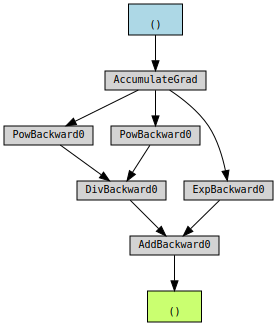

In [ ]:
from torchviz import make_dot
make_dot(p)

In [ ]:
w1 = torch.tensor([[1., 1., 0.],[0., 1., 1.],[0., 1., 1.]], requires_grad=True)
w2 = torch.tensor([[1., 1., 0.],[1., 1., 0.],[1., 1., 1.]], requires_grad=True)
w3 = torch.tensor([[1., 1., 1.],[0., 0., 1.], [0., 0., 1.]], requires_grad=True)

In [ ]:
w1.ndim, w2.ndim, w3.ndim

(2, 2, 2)

In [ ]:
X = torch.tensor([[1.0, 0, 1]], requires_grad=False)
X

tensor([[1., 0., 1.]])

In [ ]:
a1 = torch.matmul(X,w1)

In [ ]:
a1

tensor([[1., 2., 1.]], grad_fn=<MmBackward0>)

In [ ]:
h1 = torch.sigmoid(a1)
a2 = torch.matmul(h1,w2)
h2 = torch.sigmoid(a2)
a3 = torch.matmul(h2,w3)
y_pred = torch.softmax(a3, dim = 1)
y_pred

tensor([[0.1451, 0.1451, 0.7098]], grad_fn=<SoftmaxBackward0>)

In [ ]:
y = torch.tensor([0,0,1.0], requires_grad=False)

In [ ]:
loss = - torch.log(y_pred[0][2])

In [ ]:
loss

tensor(0.3428, grad_fn=<NegBackward0>)

In [ ]:
loss.backward()

In [ ]:
w1.grad

tensor([[-0.0046, -0.0024, -0.0171],
        [-0.0000, -0.0000, -0.0000],
        [-0.0046, -0.0024, -0.0171]])

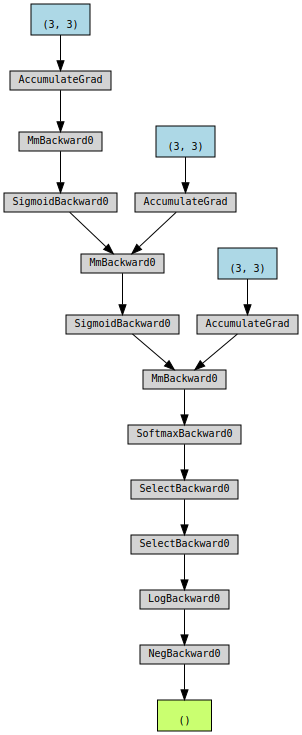

In [ ]:
make_dot(loss)

In [ ]:
w1.is_leaf, w2.is_leaf, w3.is_leaf, X.is_leaf, a1.is_leaf, a2.is_leaf, a3.is_leaf, y_pred.is_leaf, y.is_leaf

(True, True, True, True, False, False, False, False, True)

### ANN

- Training Pipeline
  - Define Model
  - for epoch in range(epochs):
    - Forward pass
    - Loss calculation
    - Backward pass
    - Parameters update
- Model Evaluation
- Improve Training Pipeline using nn.Module and torch.optim
  - nn.Linear
  - Activation Functions(nn.ReLU, nn.Sigmoid,  nn.Softmax)
  - nn.Sequential Container
  - Loss Functions (nn.BCELoss, nn.CrossEntropyLoss etc.)
     
- torch.optim (SGD,ADAM etc)

In [ ]:
from torch import nn
from sklearn.datasets import load_diabetes
import torch

X , y = load_diabetes(return_X_y=True)
print(f"Shapes:{X.shape}, {y.shape}")
print(f"X.head: \n {X[:5]}")

Shapes:(442, 10), (442,)
X.head: 
 [[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train__, X_test__, y_train__, y_test__ = train_test_split(X,y, test_size=0.2, random_state=20)

In [ ]:
X_train = torch.tensor(X_train__, dtype= torch.float32)
X_test = torch.tensor(X_test__, dtype= torch.float32)
y_train = torch.tensor(y_train__, dtype= torch.float32)
y_test = torch.tensor(y_test__, dtype= torch.float32)

In [ ]:
print(f"Information about Tensors: \n X_train: {X_train.shape},\n y_train: {y_train.shape},\n X_test: {X_test.shape},\n y_test: {y_test.shape},\n X.dtype: {X_train.dtype}, y.dtype: {y_train.dtype}")

Information about Tensors: 
 X_train: torch.Size([353, 10]),
 y_train: torch.Size([353]),
 X_test: torch.Size([89, 10]),
 y_test: torch.Size([89]),
 X.dtype: torch.float32, y.dtype: torch.float32


#### MODEL Class
- Use module class
- create layers
- def forward
- model.train() to ready parameters for tranining
- train model
 - define a loss function
 - set epochs
 - get pred
 - get loss, print it
 - make the optimizer zero_grad
 - loss,backward
 - optimizer.step --> (update weights)

In [ ]:
class myModel(torch.nn.Module):
  def __init__(self, in_features):
    super().__init__()
    self.network = torch.nn.Sequential(
        torch.nn.Linear(in_features=in_features, out_features=8),
        torch.nn.Sigmoid(),
        torch.nn.Linear(in_features=8, out_features=8),
        torch.nn.Sigmoid(),
        torch.nn.Linear(in_features=8, out_features=1)
    )
  def forward(self, x):
    return self.network(x)

In [ ]:
torch.manual_seed(42)
model = myModel(X_train.shape[1])
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
loss_fn = torch.nn.functional.mse_loss

EPOCHS = 20
for epoch in range(EPOCHS):
  model.train()
  y_pred = model.forward(X_train)
  loss = loss_fn(y_pred.squeeze(), y_train)
  print(f"Loss: {loss}")
  optimizer.zero_grad()
  #-----------
      # make gradients zero
  # model.zero_grad()
  #--------------
  loss.backward()
  #--------
  optimizer.step()
  #----------------
  # with torch.no_grad(): # gradient tracking is off
  #   for param in model.parameters():
  #     param.data -= learning_rate * param.grad
  #-----------------------

Loss: 29737.88671875
Loss: 27117.708984375
Loss: 22267.203125
Loss: 17253.533203125
Loss: 13552.642578125
Loss: 11046.998046875
Loss: 9359.0048828125
Loss: 8223.3720703125
Loss: 7459.619140625
Loss: 6946.03125
Loss: 6600.685546875
Loss: 6368.474609375
Loss: 6212.337890625
Loss: 6107.35205078125
Loss: 6036.7607421875
Loss: 5989.29443359375
Loss: 5957.37841796875
Loss: 5935.9169921875
Loss: 5921.4853515625
Loss: 5911.78076171875


In [ ]:
print("y_pred:", y_pred.shape)
print("y_train:", y_train.shape)

y_pred: torch.Size([353, 1])
y_train: torch.Size([353])


#### Dropouts and Batch Normalization

In [ ]:
import torch
import torch.nn as nn

In [ ]:
class NormalizationAndDropout(torch.nn.Module):
  def __init__(self, in_features):
    super().__init__()

    self.network = nn.Sequential(
        nn.Linear(in_features=in_features, out_features=8),
        nn.BatchNorm1d(8),
        nn.Sigmoid(),
        nn.Dropout(0.3),
        nn.Linear(in_features=8, out_features=8),
        nn.BatchNorm1d(8),
        nn.Sigmoid(),
        nn.Dropout(0.4),
        nn.Linear(in_features=8, out_features=1))

  def forward(self, x):
    return self.network(x)

torch.manual_seed(42)
model1 = NormalizationAndDropout(X_train.shape[1])
optimizer = torch.optim.SGD(model1.parameters(), lr=0.01)


In [ ]:
epochs = 30
loss_fn = torch.nn.MSELoss()
model1.train()
for epoch in range(epochs):
  y_pred = model1.forward(X_train)
  loss = loss_fn(y_train, y_pred.squeeze())
  print(loss)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

tensor(29756.5078, grad_fn=<MseLossBackward0>)
tensor(27017.7793, grad_fn=<MseLossBackward0>)
tensor(23280.1016, grad_fn=<MseLossBackward0>)
tensor(18266.6875, grad_fn=<MseLossBackward0>)
tensor(14411.6006, grad_fn=<MseLossBackward0>)
tensor(11875.5879, grad_fn=<MseLossBackward0>)
tensor(10283.5088, grad_fn=<MseLossBackward0>)
tensor(9155.9434, grad_fn=<MseLossBackward0>)
tensor(8844.9346, grad_fn=<MseLossBackward0>)
tensor(8379.2334, grad_fn=<MseLossBackward0>)
tensor(7723.3384, grad_fn=<MseLossBackward0>)
tensor(7082.4502, grad_fn=<MseLossBackward0>)
tensor(7076.6616, grad_fn=<MseLossBackward0>)
tensor(6922.3784, grad_fn=<MseLossBackward0>)
tensor(6579.4092, grad_fn=<MseLossBackward0>)
tensor(6202.2876, grad_fn=<MseLossBackward0>)
tensor(6102.1870, grad_fn=<MseLossBackward0>)
tensor(6138.5396, grad_fn=<MseLossBackward0>)
tensor(5798.8872, grad_fn=<MseLossBackward0>)
tensor(5380.3931, grad_fn=<MseLossBackward0>)
tensor(5470.5146, grad_fn=<MseLossBackward0>)
tensor(5606.7910, grad_fn=<

In [ ]:
model1.eval()

NormalizationAndDropout(
  (network): Sequential(
    (0): Linear(in_features=10, out_features=8, bias=True)
    (1): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Sigmoid()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=8, out_features=8, bias=True)
    (5): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Sigmoid()
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=8, out_features=1, bias=True)
  )
)

#### Minibatch Gradient Descent

In [ ]:
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=10, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=10, shuffle=False)

In [ ]:
for features, labels in train_loader: #for batchnorm always need more than one input in a batch
  print(features.shape)

torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([10, 10])
torch.Size([3, 10])


In [ ]:
torch.manual_seed(42)
model2 = NormalizationAndDropout(X_train.shape[1])
optimizer = torch.optim.SGD(model2.parameters(), lr=0.01)
loss_fn = torch.nn.MSELoss()

In [ ]:
#del(loss)

In [ ]:
epochs = 10
model2.train()
for epoch in range(epochs):
  loss_per_epoch = 0
  for features, labels in train_loader:
    y_pred = model2.forward(features)
    loss = loss_fn(labels, y_pred.squeeze())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_per_epoch += loss
  print("avg loss per epoch =", loss_per_epoch/X_train.shape[0])

avg loss per epoch = tensor(540.1666, grad_fn=<DivBackward0>)
avg loss per epoch = tensor(586.5269, grad_fn=<DivBackward0>)
avg loss per epoch = tensor(608.5913, grad_fn=<DivBackward0>)
avg loss per epoch = tensor(602.3675, grad_fn=<DivBackward0>)
avg loss per epoch = tensor(566.4669, grad_fn=<DivBackward0>)
avg loss per epoch = tensor(591.8240, grad_fn=<DivBackward0>)
avg loss per epoch = tensor(542.8103, grad_fn=<DivBackward0>)
avg loss per epoch = tensor(540.6816, grad_fn=<DivBackward0>)
avg loss per epoch = tensor(550.0402, grad_fn=<DivBackward0>)
avg loss per epoch = tensor(540.0875, grad_fn=<DivBackward0>)


## Day 3 Workshop

Dataset : [Dataset From Kaggle](https://www.google.com/url?q=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Farjuntejaswi%2Fplant-village)

### Data Loading Basics

In [ ]:
!pip install -q kaggle

In [ ]:
# Step 2: Upload kaggle.json (from your Kaggle account > Account > Create New API Token)
#DO THE ABOVE BEFORE RUNNIN CELL
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d arjuntejaswi/plant-village
!unzip -q plant-village.zip -d /content/plant_village

Dataset URL: https://www.kaggle.com/datasets/arjuntejaswi/plant-village
License(s): unknown


In [ ]:
import torch
from torch import nn, optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Dataset , random_split

In [ ]:
import os
import shutil

base_path = "/content/plant_village/PlantVillage"
target_path = "/content/potato_dataset"

os.makedirs(target_path, exist_ok=True)

for folder in ["Potato___healthy", "Potato___Late_blight", "Potato___Early_blight"]:
    shutil.copytree(os.path.join(base_path, folder), os.path.join(target_path, folder))

In [ ]:
potato_dataset = datasets.ImageFolder(root=target_path, transform = None) # get Image() class , we need a tensor, so transform=ToTensor()

In [ ]:
potato_dataset.classes

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [ ]:
image, label = potato_dataset[0]

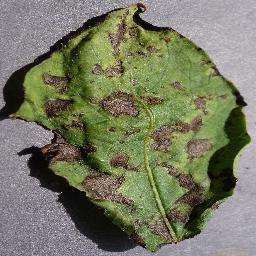

In [ ]:
image

In [ ]:
label

0

In [ ]:
del(potato_dataset)

In [ ]:
full_dataset = datasets.ImageFolder(target_path, transform = transforms.ToTensor())

In [ ]:
image, label = full_dataset[0]
print(image)
print("---"*5)
print(image.shape)

tensor([[[0.4824, 0.6314, 0.5804,  ..., 0.6824, 0.6706, 0.6627],
         [0.5137, 0.5804, 0.5569,  ..., 0.7216, 0.7059, 0.6902],
         [0.5882, 0.5255, 0.5176,  ..., 0.7020, 0.6863, 0.6745],
         ...,
         [0.5843, 0.4588, 0.5098,  ..., 0.6275, 0.6314, 0.6314],
         [0.4235, 0.4118, 0.4941,  ..., 0.6353, 0.6392, 0.6431],
         [0.5765, 0.3647, 0.5020,  ..., 0.6627, 0.6745, 0.6784]],

        [[0.4706, 0.6196, 0.5686,  ..., 0.6706, 0.6588, 0.6510],
         [0.5020, 0.5686, 0.5451,  ..., 0.7098, 0.6941, 0.6784],
         [0.5765, 0.5137, 0.5059,  ..., 0.6902, 0.6745, 0.6627],
         ...,
         [0.5686, 0.4431, 0.4941,  ..., 0.6196, 0.6235, 0.6235],
         [0.4078, 0.3961, 0.4784,  ..., 0.6275, 0.6314, 0.6353],
         [0.5608, 0.3490, 0.4863,  ..., 0.6549, 0.6667, 0.6706]],

        [[0.4980, 0.6471, 0.5961,  ..., 0.6980, 0.6863, 0.6784],
         [0.5294, 0.5961, 0.5725,  ..., 0.7373, 0.7216, 0.7059],
         [0.6039, 0.5412, 0.5333,  ..., 0.7176, 0.7020, 0.

In [ ]:
train_set , test_set = random_split(full_dataset, [0.8, 0.2])

In [ ]:
int(len(full_dataset)*0.8), len(train_set)

(1721, 1722)

In [ ]:
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)

### CNN Model Basics

In [ ]:
class myCNN(nn.Module):
  def __init__(self, in_channels, no_of_classes):
    super().__init__()

    self.features = nn.Sequential(
        nn.Conv2d(in_channels=in_channels, out_channels=32, kernel_size=3, padding=1, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1, stride=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2, padding=0),
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=64*64*64, out_features=128),
        nn.ReLU(),
        nn.Linear(in_features=128, out_features=32),
        nn.ReLU(),
        nn.Linear(in_features=32, out_features=no_of_classes)
    )
  def forward(self, x):
    x = self.features(x)
    x = self.classifier(x)
    return x


Here's a concise **cheat sheet** of formulas to compute **output size** for each layer in CNNs

---

### 📘 **Convolutional Layer Output Size**

For a 2D convolution:

$
\text{Output Size} = \left\lfloor \frac{(W - K + 2P)}{S} \right\rfloor + 1
$

Where:

- \(W\) = input width (or height)
- \(K\) = kernel size
- \(P\) = padding
- \(S\) = stride

---

### 📘 **MaxPool Layer Output Size**

Same formula as convolution:

$
\text{Output Size} = \left\lfloor \frac{(W - K)}{S} \right\rfloor + 1
$

(because usually padding is 0 in pooling)

---

### ✅ **Apply it to your network** (Assuming input is $3 \times 256 \times 256)$:

#### **Conv2d(3, 32, 3, padding=1, stride=1)**  
$
\frac{(256 - 3 + 2 \cdot 1)}{1} + 1 = 256
\Rightarrow 32 \times 256 \times 256
$

#### **MaxPool2d(2, stride=2)**  
$
\frac{(256 - 2)}{2} + 1 = 128
\Rightarrow 32 \times 128 \times 128
$

#### **Conv2d(32, 64, 3, padding=1)**  
$
\frac{(128 - 3 + 2)}{1} + 1 = 128
\Rightarrow 64 \times 128 \times 128
$

#### **MaxPool2d(2, stride=2)**  
$
\frac{(128 - 2)}{2} + 1 = 64
\Rightarrow 64 \times 64 \times 64
$

Which matches your classifier's `nn.Linear(64*64*64, 128)`

---

### 🧠 Pro Tip for Exams:
Memorize this **compact version**:
$
\text{Conv: } \left\lfloor \frac{W - K + 2P}{S} \right\rfloor + 1, \quad
\text{Pool: } \left\lfloor \frac{W - K}{S} \right\rfloor + 1
$

Use it to track dimensions step-by-step.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
from torchsummary import summary
#summary(myCNN(3,3), (3, 256, 256)) #cpu
summary(myCNN(3,3).to(device), (3, 256, 256))#gpu

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 256, 256]             896
              ReLU-2         [-1, 32, 256, 256]               0
         MaxPool2d-3         [-1, 32, 128, 128]               0
            Conv2d-4         [-1, 64, 128, 128]          18,496
              ReLU-5         [-1, 64, 128, 128]               0
         MaxPool2d-6           [-1, 64, 64, 64]               0
           Flatten-7               [-1, 262144]               0
            Linear-8                  [-1, 128]      33,554,560
              ReLU-9                  [-1, 128]               0
           Linear-10                   [-1, 32]           4,128
             ReLU-11                   [-1, 32]               0
           Linear-12                    [-1, 3]              99
Total params: 33,578,179
Trainable params: 33,578,179
Non-trainable params: 0
-------------------------

### mini-batch SGD

In [ ]:
torch.manual_seed(42)

model = myCNN(3,3).to(device)
optimizer = optim.SGD(model.parameters(), lr = 0.01)
loss_fn = nn.CrossEntropyLoss()
epochs = 20

In [ ]:
model.train()
for epoch in range(11):
  loss_per_epoch = 0
  for features, labels in train_loader:
    features = features.to(device)
    labels = labels.to(device)

    y_pred = model.forward(features)
    loss = loss_fn(y_pred, labels)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    loss_per_epoch += loss
  print(f"Loss for Epoch-{epoch}: {loss_per_epoch}")

Loss for Epoch-0: 8.265432357788086
Loss for Epoch-1: 7.4238128662109375
Loss for Epoch-2: 7.302855491638184
Loss for Epoch-3: 10.916462898254395
Loss for Epoch-4: 6.17396879196167
Loss for Epoch-5: 5.186753749847412
Loss for Epoch-6: 4.94274377822876
Loss for Epoch-7: 10.23117446899414
Loss for Epoch-8: 4.806823253631592
Loss for Epoch-9: 7.192502498626709
Loss for Epoch-10: 3.922546148300171


In [ ]:
model.eval()

myCNN(
  (features): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=262144, out_features=128, bias=True)
    (2): ReLU()
    (3): Linear(in_features=128, out_features=32, bias=True)
    (4): ReLU()
    (5): Linear(in_features=32, out_features=3, bias=True)
  )
)

In [ ]:
with torch.no_grad():
  total_loss = 0
  for features, labels in test_loader:
    features = features.to(device)
    labels = labels.to(device)

    y_pred = model.forward(features)
    loss_fn = nn.CrossEntropyLoss()
    loss = loss_fn(y_pred, labels)
    total_loss += loss
  print(total_loss)

tensor(2.7563, device='cuda:0')


### Evalution and Visualization

In [ ]:
# evaluation on test data
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

0.913953488372093


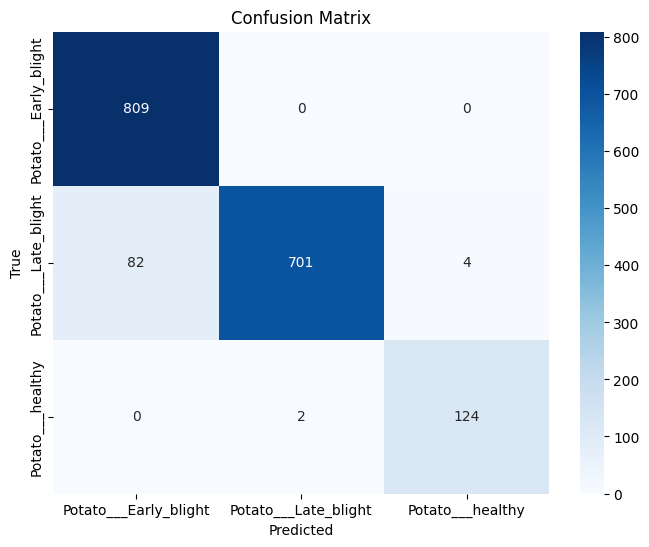

In [ ]:

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = []
y_pred = []

with torch.no_grad():
    for batch_features, batch_labels in train_loader:
        batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)
        outputs = model(batch_features)
        _, predicted = torch.max(outputs, 1)

        y_true.extend(batch_labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=full_dataset.classes, yticklabels=full_dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Day 4 Workshop

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

device(type='cuda')

In [ ]:
!pip install torch==2.0.1 torchtext==0.15.2 portalocker==2.8.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 66.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 99.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 109.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.6/102.6 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

#### Data Loading and Exploration

In [ ]:
from torchtext.datasets import IMDB
train_iter = IMDB(split='train')
test_iter = IMDB(split='test')

In [ ]:
for x in train_iter:
  print(x)
  break

(1, 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between

In [ ]:
type(train_iter) #iterator and sharded datapipe

#### Tokenizer Function

In [ ]:
from torchtext.data.utils import get_tokenizer
tokenizer = get_tokenizer("basic_english")

#### Build the vocabulary

In [ ]:
from torchtext.vocab import build_vocab_from_iterator
def yield_tokens(data_iter):
  for _, text in data_iter:
    yield tokenizer(text)
vocab = build_vocab_from_iterator(yield_tokens(train_iter), specials=["<pad>","<unk>"])
vocab.set_default_index(vocab["<unk>"])

/usr/local/lib/python3.11/dist-packages/torch/utils/data/datapipes/iter/combining.py:297: UserWarning: Some child DataPipes are not exhausted when __iter__ is called. We are resetting the buffer and each child DataPipe will read from the start again.
  warnings.warn("Some child DataPipes are not exhausted when __iter__ is called. We are resetting "


In [ ]:
len(vocab)

68812

In [ ]:
vocab["<pad>"],vocab["<unk>"]

(0, 1)

In [ ]:
vocab["controversy"],vocab["i"]

(7332, 12)

#### Building a simple RNN model for sentiment Analyis

Notes on RNN layer:-
- Always make sure the first layer has batch_first=True
- Make sure to use embeddinggs before RNN layer
- RNN layer returns the states and outputs. States are just outputs for all time steps. Here States --> Outputs, outputs --> Hidden. Use the second tuple of RNN Basically

#### Here’s a **concise clarification**:

#### 🧠 In PyTorch's `nn.RNN`:

```python
output, hidden = rnn(input)
```

- **`output`**: Contains the **outputs at *all* timesteps**.  
  Shape: `(seq_len, batch, hidden_size)`

- **`hidden`**: Contains the **final hidden state(s)** for the last timestep.  
  Shape: `(num_layers * num_directions, batch, hidden_size)`

---

#### ⚠️ So, to clarify:
- `hidden` is **not just the previous timestep’s output**, but the **last hidden state**, useful for tasks like classification or stateful sequences.
- If you want outputs from *all* timesteps, use `output`.

---

#### 🧬 Analogy:
Think of `output` as the **entire video of the RNN’s thinking** across time, while `hidden` is just **the final frame** summarizing everything it saw.

Let me know if you'd like an example with code!

In [ ]:
import torch
from torch import nn, optim
from torch.nn.utils.rnn import pad_sequence


In [ ]:
def collate_batch(batch):
  label_list, text_list = [], []
  for label, text in batch:
    label_list.append(0 if label == 1 else 1)
    processed_text = torch.tensor(vocab(tokenizer(text)))
    text_list.append(processed_text)
  label_list = torch.tensor(label_list)
  text_list = pad_sequence(text_list, batch_first=True)
  return label_list, text_list


In [ ]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_iter, batch_size=16, shuffle=True, collate_fn=collate_batch)
test_loader = DataLoader(test_iter, batch_size=16, shuffle=False, collate_fn=collate_batch)

In [ ]:
class sentimentModel(nn.Module):
  def __init__(self,embeddings_length,classes,padding_idx):
    super().__init__()
    self.embedding = nn.Embedding(
        num_embeddings=embeddings_length,
        embedding_dim=64,
        padding_idx=padding_idx
    )
    self.rnn = nn.RNN(input_size=64, hidden_size=32, num_layers=1, batch_first=True)
    self.linear = nn.Linear(in_features=32, out_features=2) #in features = hidden_size or no of rnn units in rnn layer

  def forward(self,text_data):
    embeddings = self.embedding(text_data)
    output, hidden = self.rnn(embeddings)
    return self.linear(hidden[-1])

How RNN returns output

In [ ]:
tensor = torch.randn(16, 1700, 64) # 16 movies having 1700 word or tokens with padding and  each word having 64 size embedding
rnn_layer =   nn.RNN(input_size = 64, hidden_size =32, num_layers = 2, batch_first = True)
states, output = rnn_layer(tensor)
states.shape, output.shape

(torch.Size([16, 1700, 32]), torch.Size([2, 16, 32]))

In [ ]:
tensor = torch.randn(16, 1700, 64) # 16 movies having 1700 word or tokens with padding and  each word having 64 size embedding
rnn_layer =   nn.RNN(input_size = 64, hidden_size =32, num_layers = 1, batch_first = True)
states, output = rnn_layer(tensor)
states.shape, output.shape

(torch.Size([16, 1700, 32]), torch.Size([1, 16, 32]))

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [ ]:
torch.manual_seed(42)

model = sentimentModel(embeddings_length=len(vocab), classes=2, padding_idx=vocab["<pad>"]).to(device)
optimizer = optim.SGD(model.parameters(), lr = 0.01)
loss_fn = nn.CrossEntropyLoss()
epochs = 20

In [ ]:
model.train()
for epoch in range(epochs+1):
  loss_per_epoch = 0
  for labels, features in train_loader:
    features = features.to(device)
    labels = labels.to(device)

    y_pred = model.forward(features)

    loss = loss_fn(y_pred, labels)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    loss_per_epoch += loss
  print(f"Loss for Epoch-{epoch}: {loss_per_epoch}")




Streaming output truncated to the last 5000 lines.
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])

In [ ]:
model.eval()
total = 0
correct = 0

with torch.no_grad():

  for batch_labels, batch_features in train_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape

In [ ]:
#9 evaluate on test data
model.eval()

with torch.no_grad():
  loss_per_epoch = 0
  for labels, features in test_loader:
    features = features.to(device)
    labels = labels.to(device)


    # forward pass
    y_pred = model.forward(features)

    # loss computation
    loss_func = nn.CrossEntropyLoss()
    loss = loss_func(y_pred, labels)

    loss_per_epoch += loss

  print("loss per epoch =", loss_per_epoch)

Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape

In [ ]:
# Accuracy on test data
total = 0
correct = 0

with torch.no_grad():

  for batch_labels, batch_features in test_loader:

    # move data to gpu
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

    outputs = model(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(correct/total)

Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape: torch.Size([1, 16, 32])
Hidden.shape